# Project objective

To perform a comprehensive step-by-step exploratory data analysis to understand the 
key factors that influence loan approval.

Following activities would be carried out: -
1. Data loading and inspection
2. Data cleaning
3. Univariate analysis
4. Bivariate analysis
5. Feature engineering
6. Multivariate analysis
7. Data visualization and deriving insights

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Setting plot style
sns.set(style="whitegrid")

# Data loading and inspection

In [2]:
df=pd.read_csv("/kaggle/input/loan-approval-dataset/loan_approval.csv")
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [3]:
df.shape

(2000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


**Inference from initial inspection: -**
1. Number of rows: 2000
2. Number of columns: 8
3. Number of independent features: 7
4. There are no columns with missing values.

In [5]:
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


# Univariate analysis

In [6]:
df['loan_approved'].value_counts()

loan_approved
False    1121
True      879
Name: count, dtype: int64

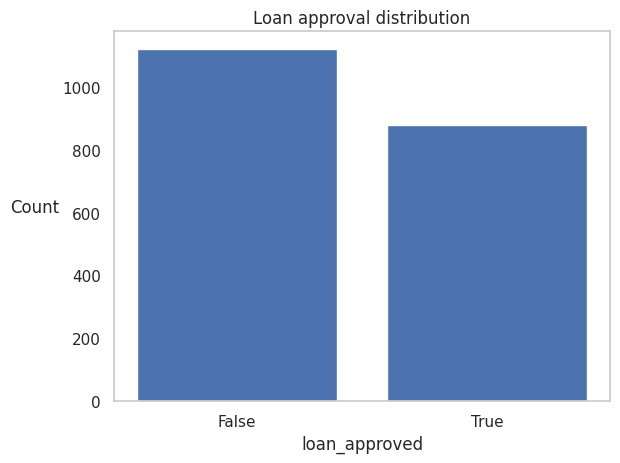

In [7]:
value_counts = df['loan_approved'].value_counts()
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.title("Loan approval distribution")
plt.xlabel("loan_approved")
plt.ylabel("Count", rotation=0, labelpad=20)
plt.grid(False)
plt.show()

**Key insights: -**
* We observed class imbalance for **loan_approved**. We have more number of applicants whose loan was not approved compared to the number of applicants whose loan was approved.

In [8]:
df['city'].value_counts()

city
North Joseph        4
Williamsstad        3
West Elizabeth      3
Port Christopher    3
East Mary           3
                   ..
Lake Sean           1
Williamston         1
Jimenezburgh        1
South Kaylee        1
New Nathantown      1
Name: count, Length: 1882, dtype: int64

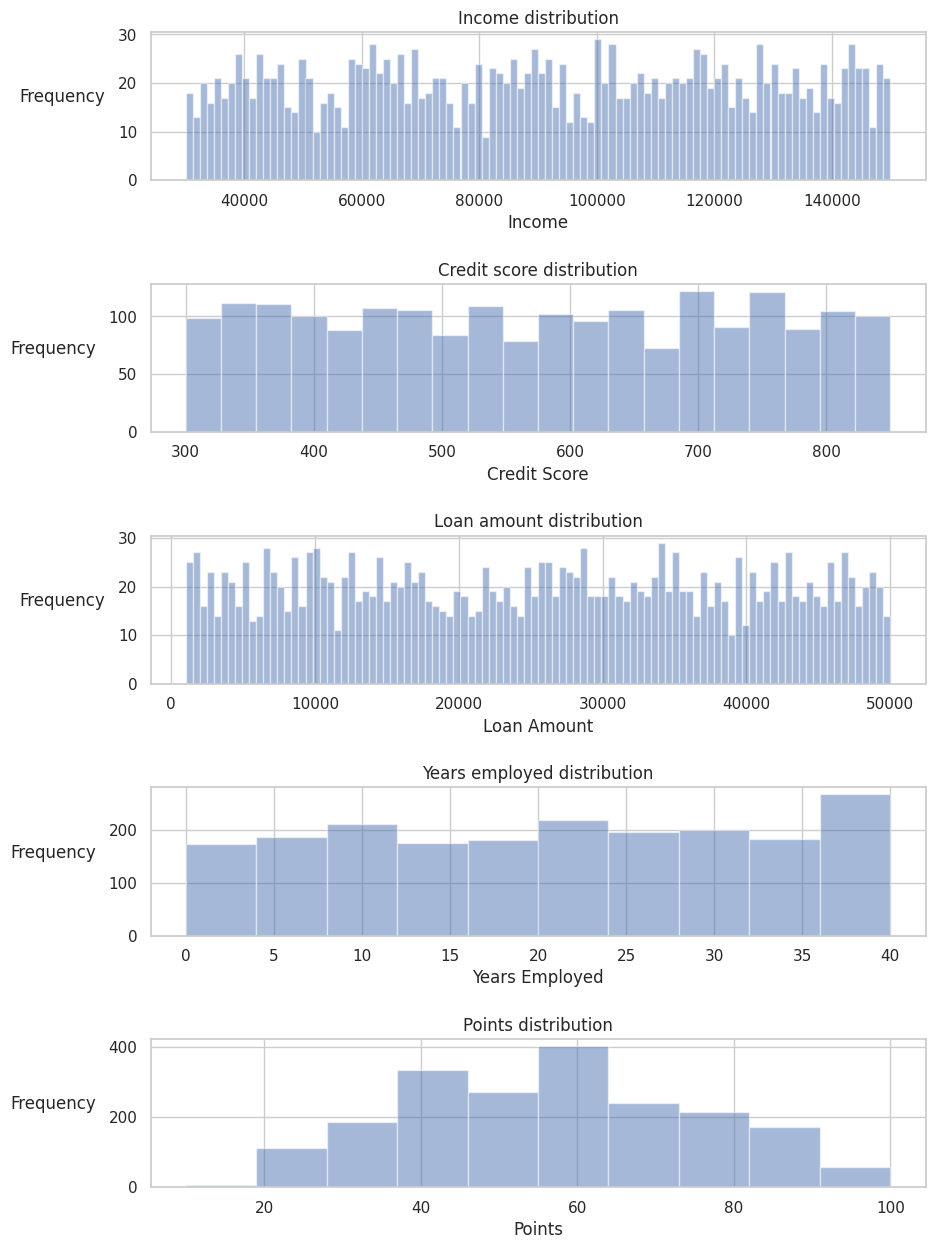

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

plt.subplots_adjust(hspace=0.7)

axes[0].hist(df['income'], bins=100, color='b', alpha=0.5)
axes[0].set_title('Income distribution')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency',rotation=0, labelpad=40)

axes[1].hist(df['credit_score'], bins=20, color='b', alpha=0.5)
axes[1].set_title('Credit score distribution')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Frequency',rotation=0, labelpad=40)

axes[2].hist(df['loan_amount'], bins=100, color='b', alpha=0.5)
axes[2].set_title('Loan amount distribution')
axes[2].set_xlabel('Loan Amount')
axes[2].set_ylabel('Frequency',rotation=0, labelpad=40)

axes[3].hist(df['years_employed'], bins=10, color='b', alpha=0.5)
axes[3].set_title('Years employed distribution')
axes[3].set_xlabel('Years Employed')
axes[3].set_ylabel('Frequency',rotation=0, labelpad=40)

axes[4].hist(df['points'], bins=10, color='b', alpha=0.5)
axes[4].set_title('Points distribution')
axes[4].set_xlabel('Points')
axes[4].set_ylabel('Frequency',rotation=0, labelpad=40)

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

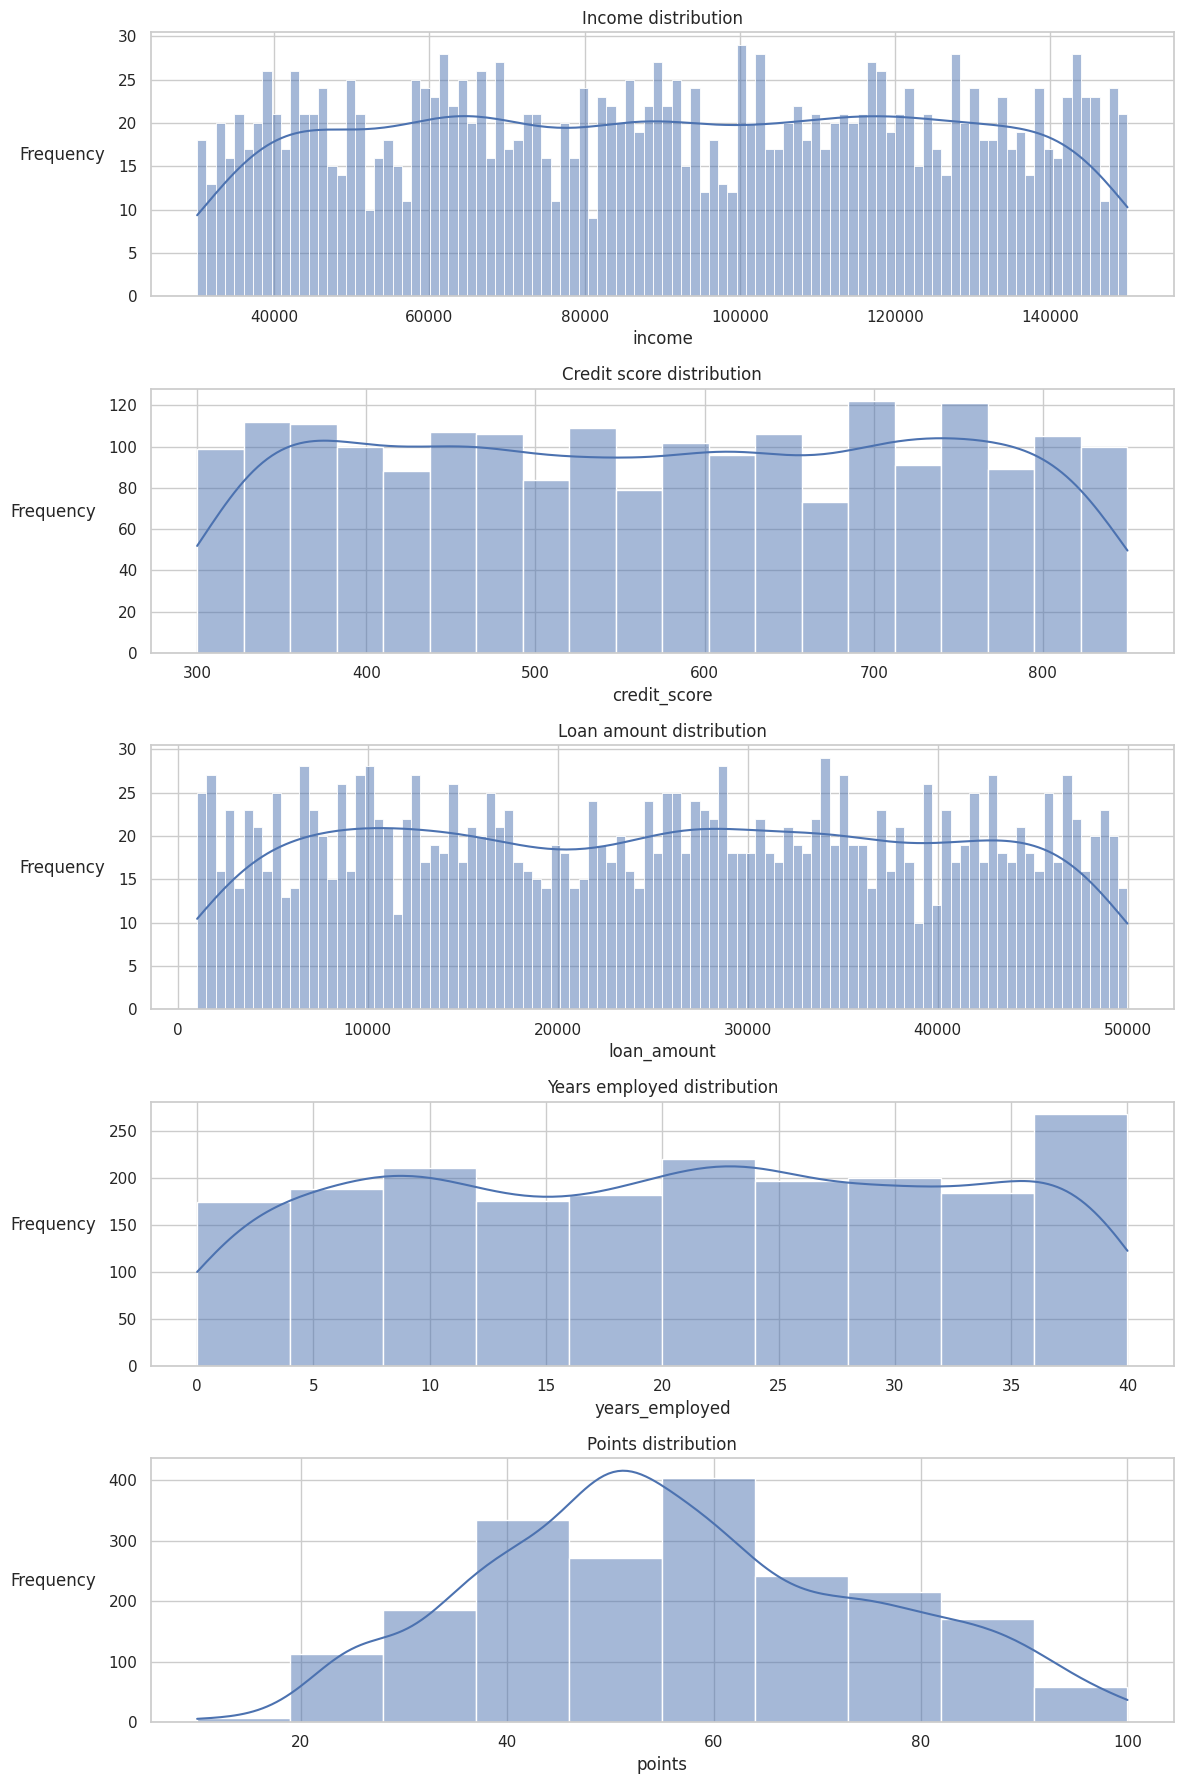

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18))
#Plotting income distribution
sns.histplot(ax=axes[0], data=df, x='income', kde=True, bins=100).set_title("Income distribution")
axes[0].set_ylabel("Frequency", rotation=0, labelpad=40)

#Plotting credit score distribution
sns.histplot(ax=axes[1], data=df, x='credit_score', kde=True, bins=20).set_title("Credit score distribution")
axes[1].set_ylabel("Frequency", rotation=0, labelpad=40)

#Plotting loan amount distribution
sns.histplot(ax=axes[2], data=df, x='loan_amount', kde=True, bins=100).set_title("Loan amount distribution")
axes[2].set_ylabel("Frequency", rotation=0, labelpad=40)

#Plotting years employed distribution
sns.histplot(ax=axes[3], data=df, x='years_employed', kde=True, bins=10).set_title("Years employed distribution")
axes[3].set_ylabel("Frequency", rotation=0, labelpad=40)

#Plotting points distribution
sns.histplot(ax=axes[4], data=df, x='points', kde=True, bins=10).set_title("Points distribution")
axes[4].set_ylabel("Frequency", rotation=0, labelpad=40)

plt.tight_layout()

plt.show()

**Key insights: -**
* **points**: The data is normally distributed.
  It peaks around 60 points.
* **For remaining numeric features**, the data is having nearly equal distribution.

# Bivariate analysis

Here we explore relationship between all independent features with the target variable: loan_approved.

**Bivariate analysis for Numeric features**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


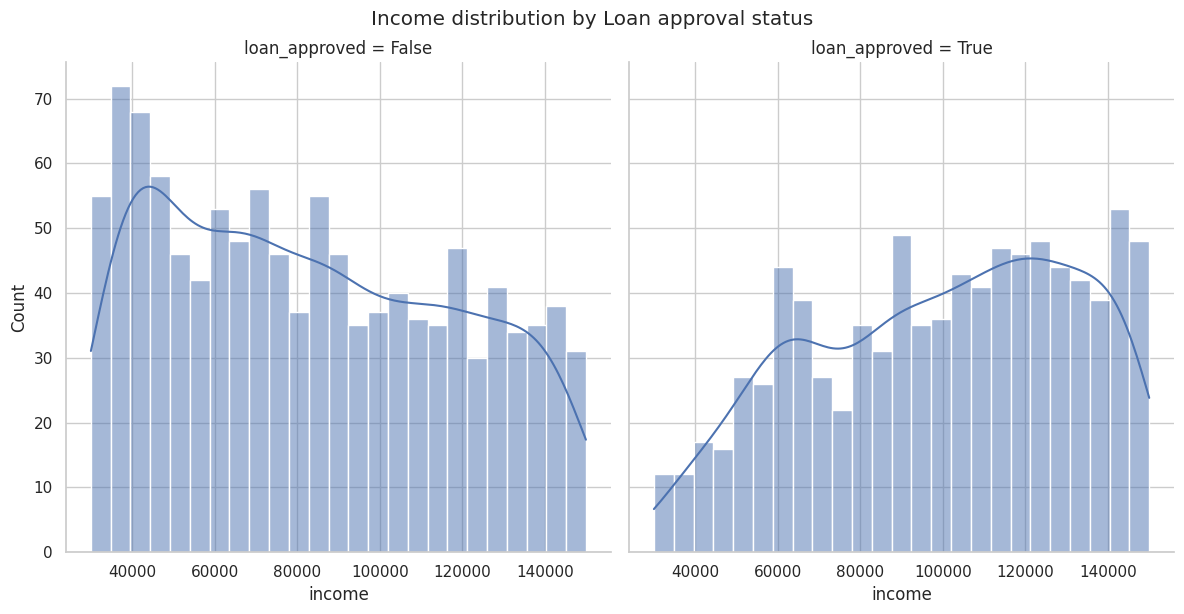

In [11]:
#income vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'income', bins=25, kde=True)
plt.suptitle("Income distribution by Loan approval status", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


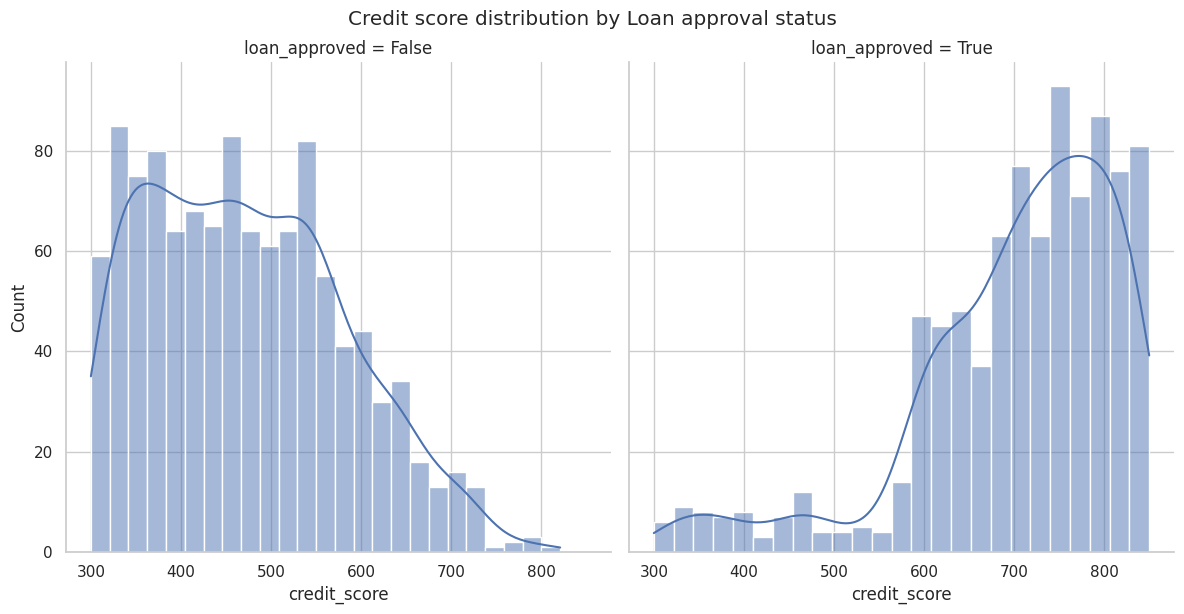

In [12]:
#credit_score vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'credit_score', bins=25, kde=True)
plt.suptitle("Credit score distribution by Loan approval status", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


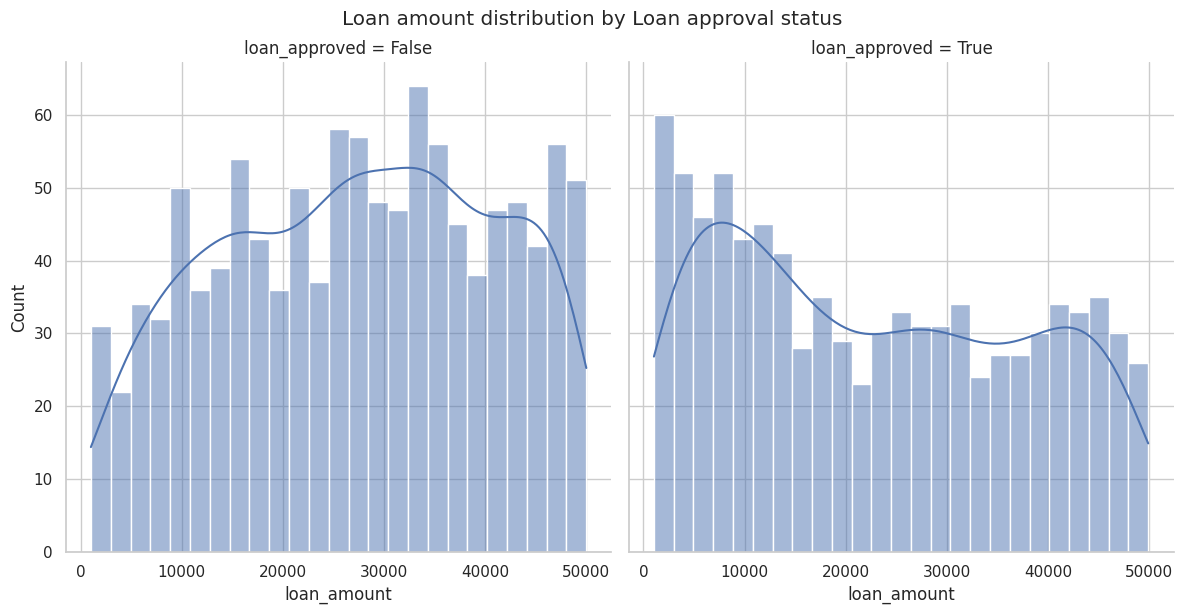

In [13]:
#loan_amount vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'loan_amount', bins=25, kde=True)
plt.suptitle("Loan amount distribution by Loan approval status", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


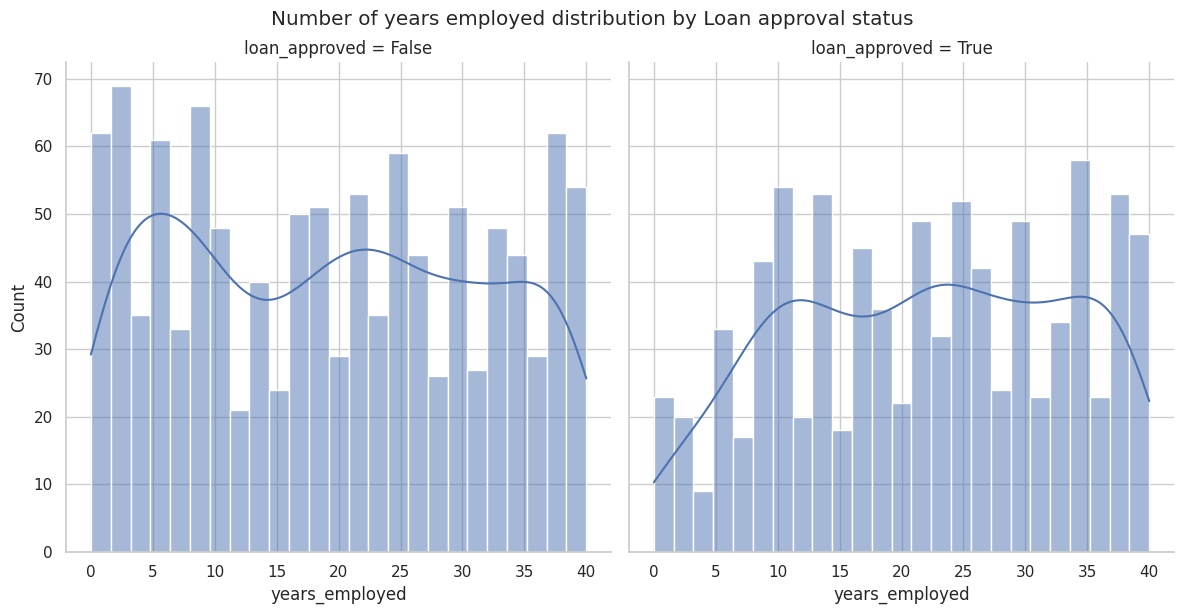

In [14]:
#years_employed vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'years_employed', bins=25, kde=True)
plt.suptitle("Number of years employed distribution by Loan approval status", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


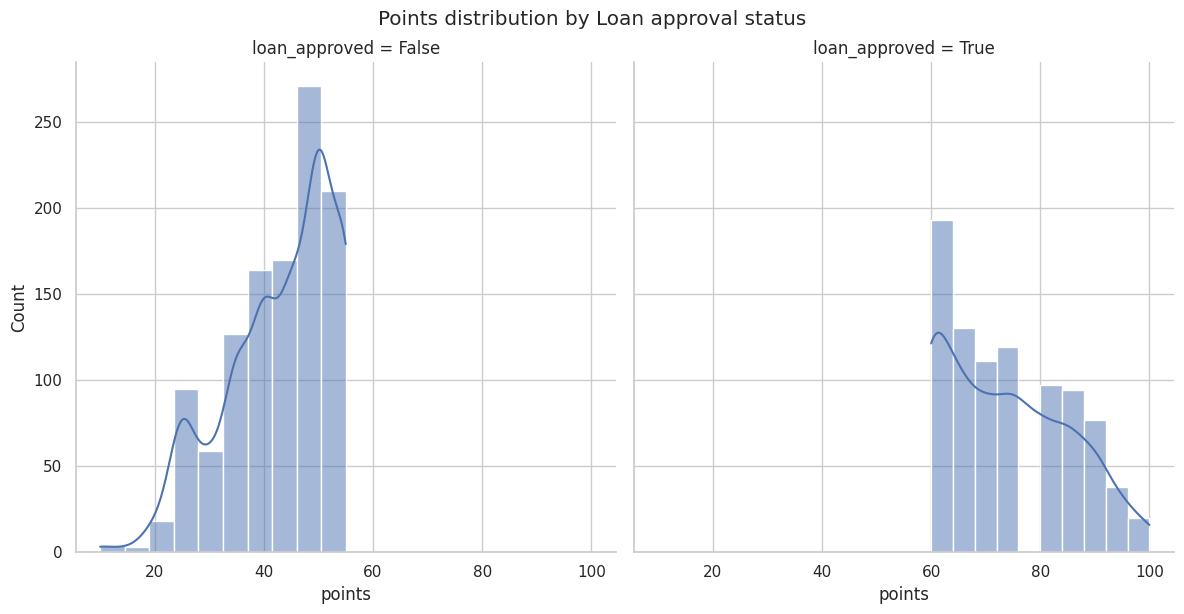

In [15]:
#points vs loan_approved
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'points', bins=10, kde=True)
plt.suptitle("Points distribution by Loan approval status", y=1.02)
plt.show()

In [16]:
#city vs loan_approved
cross_city_loan=pd.crosstab(df['city'],df['loan_approved'])
print(cross_city_loan)
max_values_per_column=cross_city_loan.max()
print("\nMaximum value from each column:")
print(max_values_per_column)

loan_approved  False  True 
city                       
Aaronstad          0      1
Adamburgh          1      0
Adamland           1      0
Adammouth          1      0
Adamsfort          1      0
...              ...    ...
Yatesbury          1      0
Youngbury          0      1
Yumouth            1      0
Zacharyton         0      1
Zamoramouth        0      1

[1882 rows x 2 columns]

Maximum value from each column:
loan_approved
False    2
True     2
dtype: int64


**Key insights: -**

* **income:** As the income increases, the likelihood of loan getting approved gets higher. For lower income applicants, we observed more number of denials. For higher income applicants, we observed more number of approvals.
   
* **credit_score:** As the credit score increases, the likelihood of loan getting approved gets higher. When credit score is less than 600, we observed most number of denials in loan approval. However, when credit score was greater than 600, we observed most number of loan approvals.

* **loan_amount:** As the loan amount increases, the likelihood of loan getting approved gets reduced. For lower loan amount, we observed more number of approvals. For higher loan amount, we observed less number of approvals.

* **years_employed:** Among the applicants whose loan application was denied, their years of experience didn't played much role. We observed that there was denial of loan applications for applicants with diverse level of work experience.
Among the applicants whose loan application was approved, we observed that applicants who have spent upto 5 years in work, have relatively lower acceptance of loan application than the applicants who have spent greater than 5 years have similar and higher acceptance of loan application.

* **points:** As the points computed for the loan applicant increases from 0 to 60, the likelihood of loan getting denied gets higher. As the points computed for loan applicant increases from 60 to 100, the likelihood of loan getting approved gets lower.
We observed that the most number of loan applications getting approved occurr when the points computed for the loan applicant is around 60.

* **city:** We do not get any information to relate loan approval with city of the applicant.

# Outlier analysis

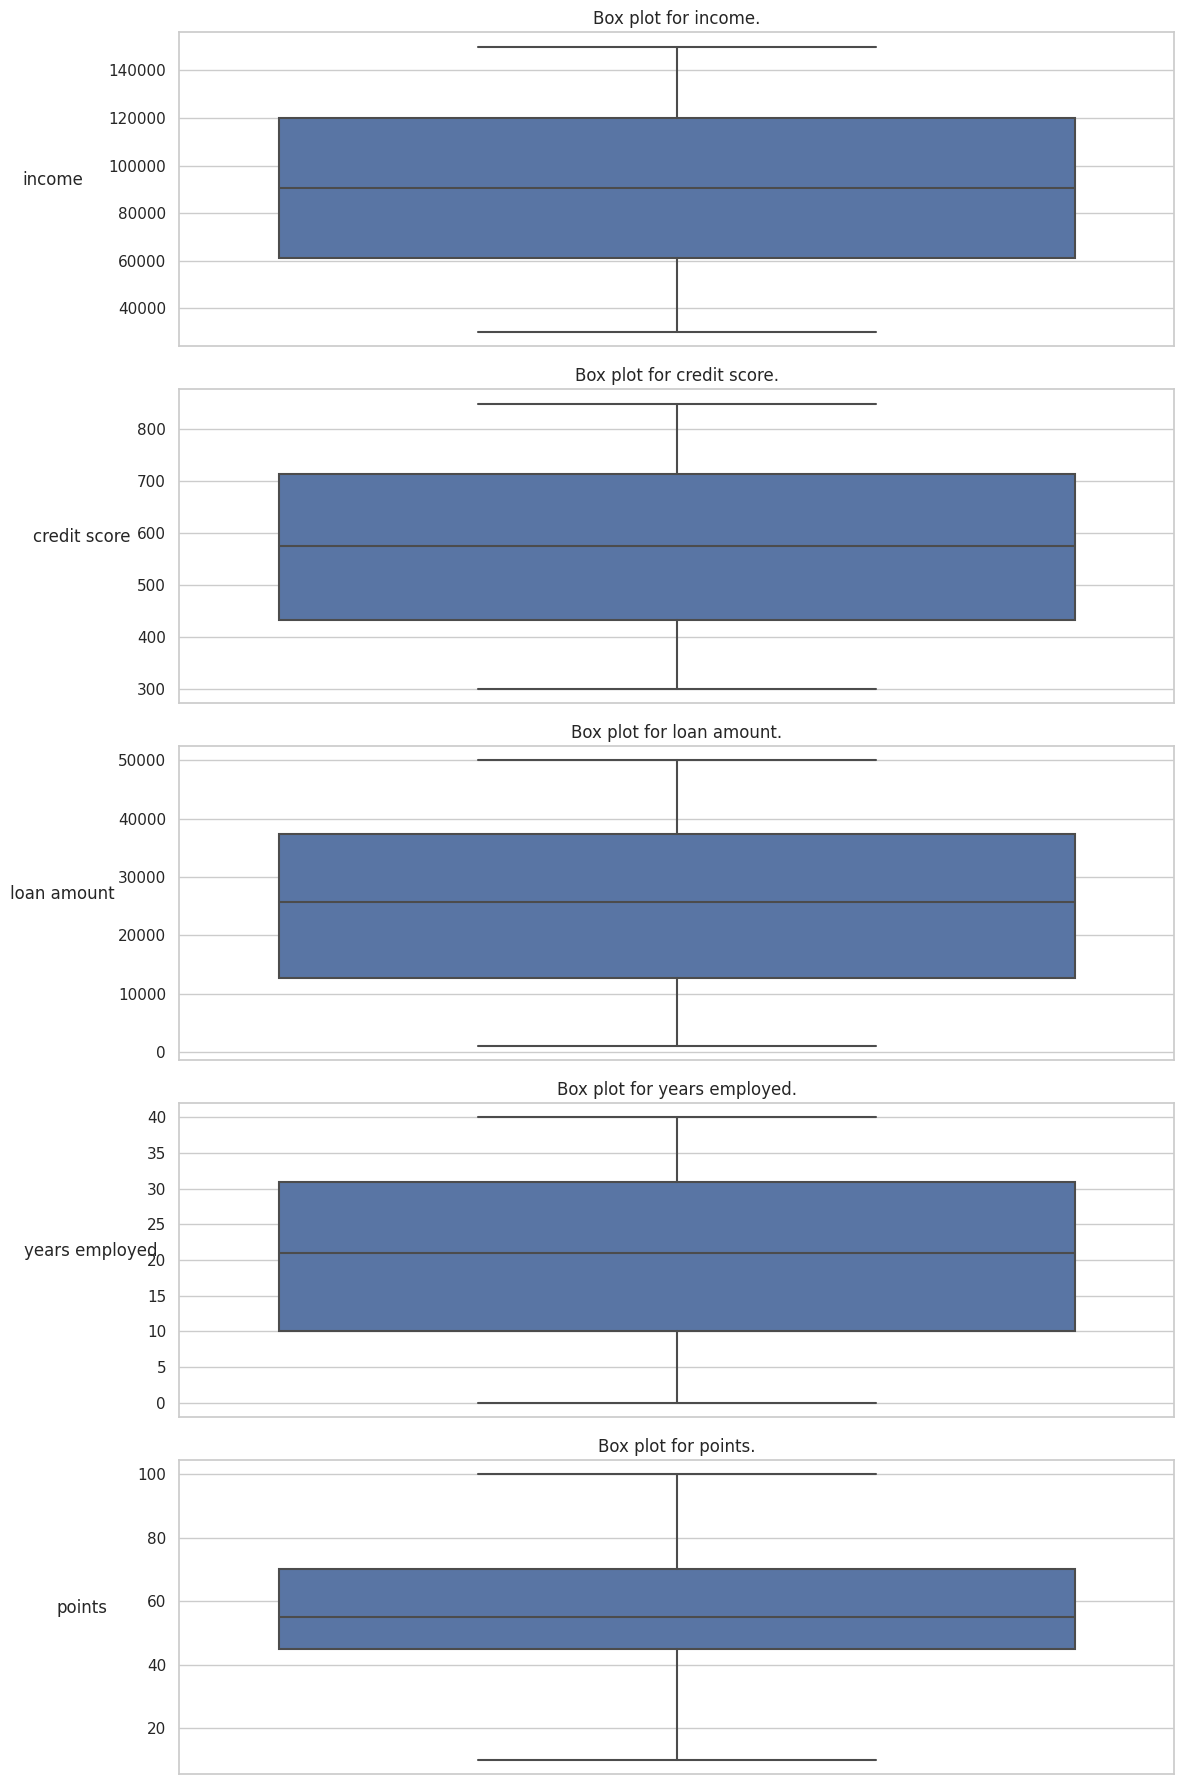

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18))
#Outlier analysis for income
sns.boxplot(ax=axes[0], y='income', data=df).set_title("Box plot for income.")
axes[0].set_ylabel("income", rotation=0, labelpad=40)

#Outlier analysis for credit score
sns.boxplot(ax=axes[1], y='credit_score', data=df).set_title("Box plot for credit score.")
axes[1].set_ylabel("credit score", rotation=0, labelpad=40)

#Outlier analysis for loan amount
sns.boxplot(ax=axes[2], y='loan_amount', data=df).set_title("Box plot for loan amount.")
axes[2].set_ylabel("loan amount", rotation=0, labelpad=40)

#Outlier analysis for years employed
sns.boxplot(ax=axes[3], y='years_employed', data=df).set_title("Box plot for years employed.")
axes[3].set_ylabel("years employed", rotation=0, labelpad=40)

#Outlier analysis for points
sns.boxplot(ax=axes[4], y='points', data=df).set_title("Box plot for points.")
axes[4].set_ylabel("points", rotation=0, labelpad=40)

plt.tight_layout()

plt.show()

**Observation:** The box plot confirms that there are no outliers in any of our numeric features in the dataset.

# Feature engineering

In [18]:
#Creating debt_ratio column
df['debt_ratio']=df['loan_amount']/df['income']
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved,debt_ratio
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False,0.348809
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False,0.346385
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False,0.336228
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False,0.383841
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False,0.714238


**Debt ratio:** It is a financial ratio that measures the extent of leverage by comparing debt with asset.

* A higher debt ratio (greater than 1) indicates higher risk of defaulting loans.

* A lower debt ratio (lower than 1) indicates lower risk of defaulting loans.

* It helps to determine the capacity to serve debt commitments over the period of time.

Reference for above information: https://www.investopedia.com/terms/d/debtratio.asp

In [19]:
#Creating coverage_ratio column
df['coverage_ratio']=df['income']/df['loan_amount']
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved,debt_ratio,coverage_ratio
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False,0.348809,2.866895
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False,0.346385,2.886961
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False,0.336228,2.974171
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False,0.383841,2.605248
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False,0.714238,1.400093


**Coverage ratio:** It is one of the solvency ratios which focuses on long-term financial stability.

* It tells whether the applicant can service the debt.

* A higher coverage ratio indicates lower risk in servicing of debt payments.

* A lower coverage ratio indicates higher risk in servicinng of debt payments.

Reference: https://www.investopedia.com/terms/c/coverageratio.asp

We can use **Debt ratio** and **Coverage ratio** to compare loan applicants among different catgeories to understand the implications of the results and derive more information about likelihood of loan approval.

In [20]:
#Creating a column by computing ratio of loan amount and credit score
df['ratio_loan_amt_by_credit_score']=df['loan_amount']/df['credit_score']
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved,debt_ratio,coverage_ratio,ratio_loan_amt_by_credit_score
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False,0.348809,2.866895,102.051414
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False,0.346385,2.886961,21.187929
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False,0.336228,2.974171,19.159247
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False,0.383841,2.605248,141.927326
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False,0.714238,1.400093,95.108871


* The ratio of loan amount and credit score helps us compare the applications.
* For example: - We have two applicants having same loan amount: 1000, but their credit score is on extreme ends.
    * Applicant 1 has credit score: 10 (very poor).
      Thus, ratio of loan amount to credit score is 1000/10 = 100
    * Applicant 2 has credit score: 100 (very strong).
      Thus, ratio of loan amount to credit score is 1000/100 = 10
* As the result, for a given amount, applicant 2 has lower risk than applicant 1.
* The ratio tells per unit credit score, the loan amount for the applicant, and lower the value, lower the risk.

In [21]:
#Creating a column by computing ratio of loan amount and years employed
df['ratio_loan_amt_by_work_exp']=round(df['loan_amount']/df['years_employed'],3)
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved,debt_ratio,coverage_ratio,ratio_loan_amt_by_credit_score,ratio_loan_amt_by_work_exp
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False,0.348809,2.866895,102.051414,1470.296
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False,0.346385,2.886961,21.187929,551.643
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False,0.336228,2.974171,19.159247,860.692
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False,0.383841,2.605248,141.927326,1683.552
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False,0.714238,1.400093,95.108871,11793.500


* The ratio of loan amount by years employed tells us whether there is any correlation between applicants applying for loan with the tenure of their employment.
* We can determine if higher loan amount is asked by people with long duration of work or people who have recently started to work.
* Then we can check if it has any correlation with loan approval status.

In [22]:
#Creating a column by computing ratio of points and years employed
df['ratio_points_by_work_exp']=df['points']/df['years_employed']
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved,debt_ratio,coverage_ratio,ratio_loan_amt_by_credit_score,ratio_loan_amt_by_work_exp,ratio_points_by_work_exp
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False,0.348809,2.866895,102.051414,1470.296,1.851852
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False,0.346385,2.886961,21.187929,551.643,1.964286
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False,0.336228,2.974171,19.159247,860.692,3.461538
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False,0.383841,2.605248,141.927326,1683.552,1.724138
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False,0.714238,1.400093,95.108871,11793.500,6.250000


* The ratio of points by years employed helps us determine if the points computed for the applicant depends on the tenure of their employment.
* The ratio also tells that per year of employment how many points they earned.
* It also tells if the points computed for an applicant is higher only when their work experience is more, or if the points computed for an applicant can be higher if the applicant has newly started working or have a mid-level experience.
* Then we can check if the ratio has any correlation with loan approval status.

In [23]:
#Creating a column by computing ratio of points and income
df['ratio_points_by_income']=df['points']/df['income']
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved,debt_ratio,coverage_ratio,ratio_loan_amt_by_credit_score,ratio_loan_amt_by_work_exp,ratio_points_by_work_exp,ratio_points_by_income
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False,0.348809,2.866895,102.051414,1470.296,1.851852,0.000439
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False,0.346385,2.886961,21.187929,551.643,1.964286,0.001233
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False,0.336228,2.974171,19.159247,860.692,3.461538,0.001352
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False,0.383841,2.605248,141.927326,1683.552,1.724138,0.000393
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False,0.714238,1.400093,95.108871,11793.500,6.250000,0.000379


* The ratio of points by income tells us if there is any relation between points computed for the applicant with respect to their earnings.
* It also tells if the points computed for an applicant is higher only for high income applicants, or if the points computed for an applicant can be higher for mid income or low income applicants as well.
* Then, we can check if there is any correlation of the ratio with the loan approval status.

In [24]:
#Creating a column by computing ratio of credit score and income
df['ratio_credit_score_by_income']=df['credit_score']/df['income']
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved,debt_ratio,coverage_ratio,ratio_loan_amt_by_credit_score,ratio_loan_amt_by_work_exp,ratio_points_by_work_exp,ratio_points_by_income,ratio_credit_score_by_income
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False,0.348809,2.866895,102.051414,1470.296,1.851852,0.000439,0.003418
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False,0.346385,2.886961,21.187929,551.643,1.964286,0.001233,0.016348
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False,0.336228,2.974171,19.159247,860.692,3.461538,0.001352,0.017549
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False,0.383841,2.605248,141.927326,1683.552,1.724138,0.000393,0.002704
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False,0.714238,1.400093,95.108871,11793.500,6.250000,0.000379,0.007510


* The ratio of credit score by income tells us if there is any relation between credit score computed for the applicant with respect to their earnings.
* It also tells if the credit score computed for an applicant is higher only for high income applicants, or if the credit score computed for an applicant can be higher for mid income or low income applicants as well.
* Then, we can check if there is any correlation of the ratio with the loan approval status.

In [25]:
#Categorization of years employed
df["early_career"] = 0
df["mid_level"] = 0
df["senior_level"] = 0
df["very_senior_level"] = 0

df.loc[df["years_employed"]<=3,"early_career"]=1
df.loc[(df["years_employed"]>3) & (df["years_employed"]<=20), "mid_level"]=1
df.loc[(df["years_employed"]>20) & (df["years_employed"]<=30), "senior_level"]=1
df.loc[df["years_employed"]>30,"very_senior_level"]=1
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved,debt_ratio,coverage_ratio,ratio_loan_amt_by_credit_score,ratio_loan_amt_by_work_exp,ratio_points_by_work_exp,ratio_points_by_income,ratio_credit_score_by_income,early_career,mid_level,senior_level,very_senior_level
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False,0.348809,2.866895,102.051414,1470.296,1.851852,0.000439,0.003418,0,0,1,0
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False,0.346385,2.886961,21.187929,551.643,1.964286,0.001233,0.016348,0,0,1,0
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False,0.336228,2.974171,19.159247,860.692,3.461538,0.001352,0.017549,0,1,0,0
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False,0.383841,2.605248,141.927326,1683.552,1.724138,0.000393,0.002704,0,0,1,0
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False,0.714238,1.400093,95.108871,11793.500,6.250000,0.000379,0.007510,0,1,0,0


* We have categorized the years of experience into 4 categories.
  * years_employed<=3 : early career
  * years_employed>3 and years_employed<=20 : mid level
  * years_employed>20 and years_employed<=30 : senior level
  * years_employed>30 : very senior level
* This categorization will help to understand more details about loan approval status, and get more patterns about loan application for people with respect to their work level.

In [26]:
df[["years_employed","early_career","mid_level","senior_level","very_senior_level"]].head()

,years_employed,early_career,mid_level,senior_level,very_senior_level
0,27,0,0,1,0
1,28,0,0,1,0
2,13,0,1,0,0
3,29,0,0,1,0
4,4,0,1,0,0


In [27]:
#Dropping the extra columns: name and city
df.drop(["name","city"],axis=1,inplace=True)

In [28]:
df.head()

,income,credit_score,loan_amount,years_employed,points,loan_approved,debt_ratio,coverage_ratio,ratio_loan_amt_by_credit_score,ratio_loan_amt_by_work_exp,ratio_points_by_work_exp,ratio_points_by_income,ratio_credit_score_by_income,early_career,mid_level,senior_level,very_senior_level
0,113810,389,39698,27,50.0,False,0.348809,2.866895,102.051414,1470.296,1.851852,0.000439,0.003418,0,0,1,0
1,44592,729,15446,28,55.0,False,0.346385,2.886961,21.187929,551.643,1.964286,0.001233,0.016348,0,0,1,0
2,33278,584,11189,13,45.0,False,0.336228,2.974171,19.159247,860.692,3.461538,0.001352,0.017549,0,1,0,0
3,127196,344,48823,29,50.0,False,0.383841,2.605248,141.927326,1683.552,1.724138,0.000393,0.002704,0,0,1,0
4,66048,496,47174,4,25.0,False,0.714238,1.400093,95.108871,11793.500,6.250000,0.000379,0.007510,0,1,0,0


# Multivariate analysis

**Debt ratio**

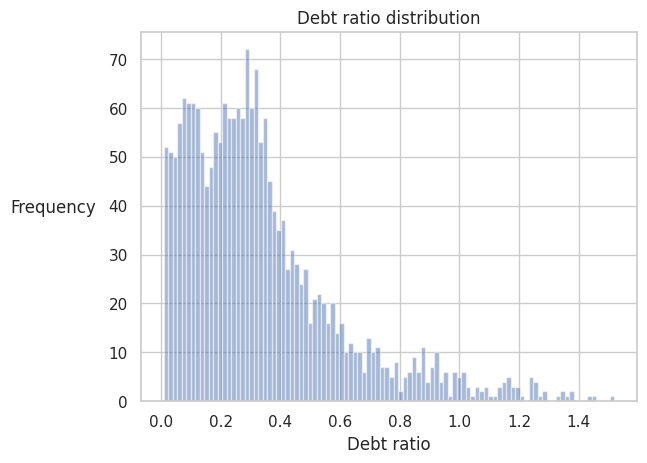

In [29]:
plt.hist(df['debt_ratio'], bins=100, color='b', alpha=0.5)
plt.title('Debt ratio distribution')
plt.xlabel('Debt ratio')
plt.ylabel('Frequency',rotation=0, labelpad=40)

plt.show()

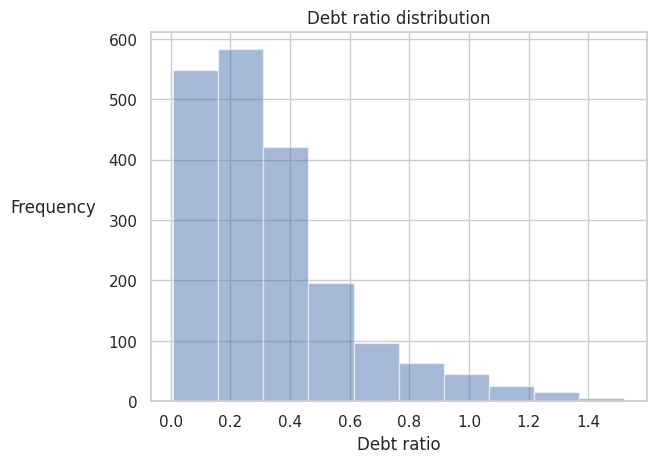

In [30]:
plt.hist(df['debt_ratio'], bins=10, color='b', alpha=0.5)
plt.title('Debt ratio distribution')
plt.xlabel('Debt ratio')
plt.ylabel('Frequency',rotation=0, labelpad=40)

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Debt ratio distribution by Loan approval status')

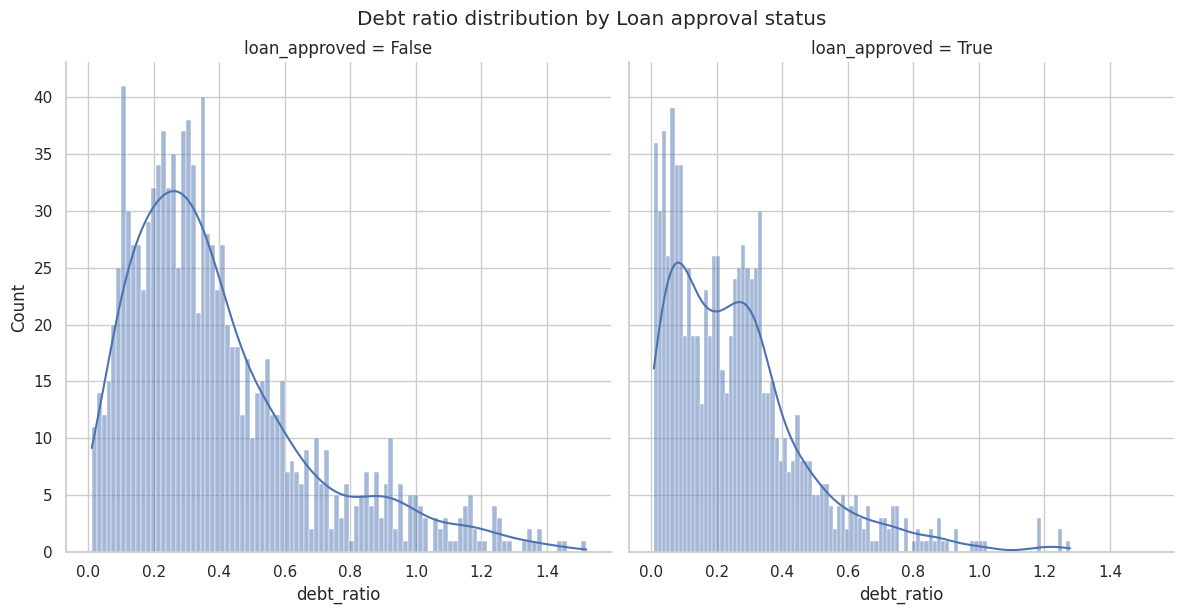

In [31]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'debt_ratio', bins=100, kde=True)
plt.suptitle("Debt ratio distribution by Loan approval status", y=1.02)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Debt ratio distribution by Loan approval status')

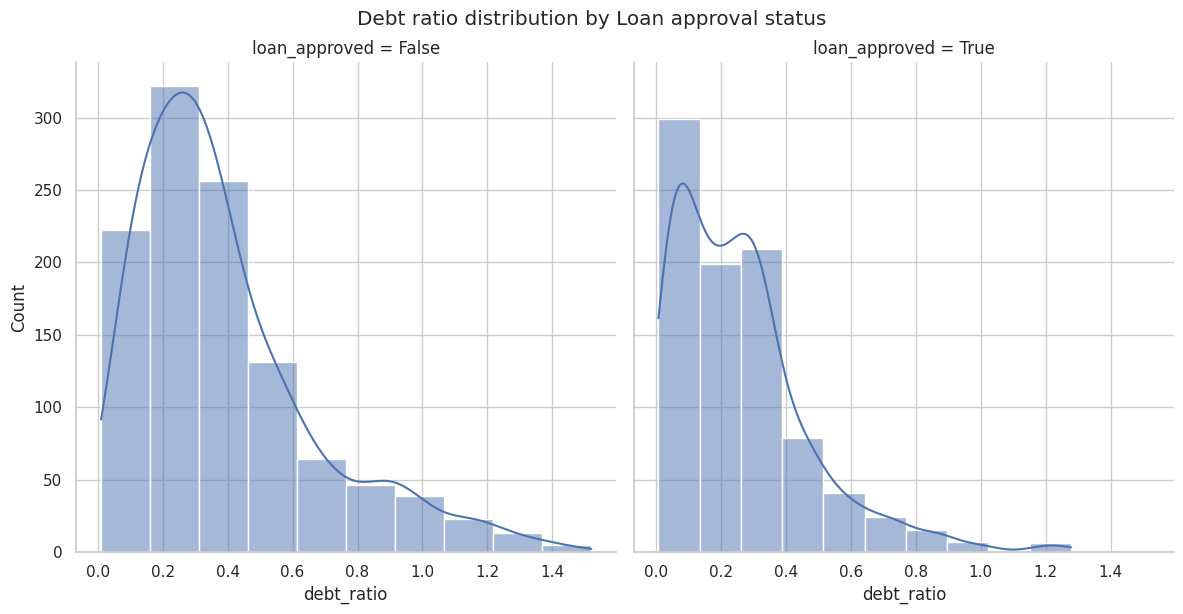

In [32]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'debt_ratio', bins=10, kde=True)
plt.suptitle("Debt ratio distribution by Loan approval status", y=1.02)

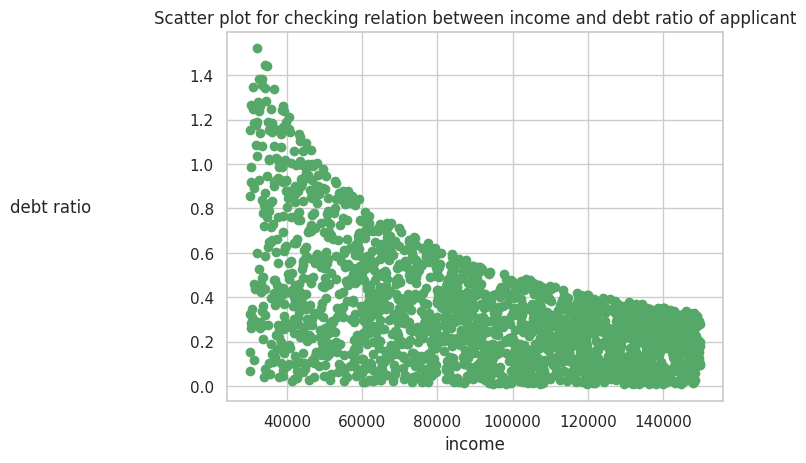

In [33]:
plt.scatter(df['income'],df['debt_ratio'],c='g')
plt.title('Scatter plot for checking relation between income and debt ratio of applicant')
plt.xlabel('income')
plt.ylabel('debt ratio', rotation=0, labelpad=100)
plt.show()

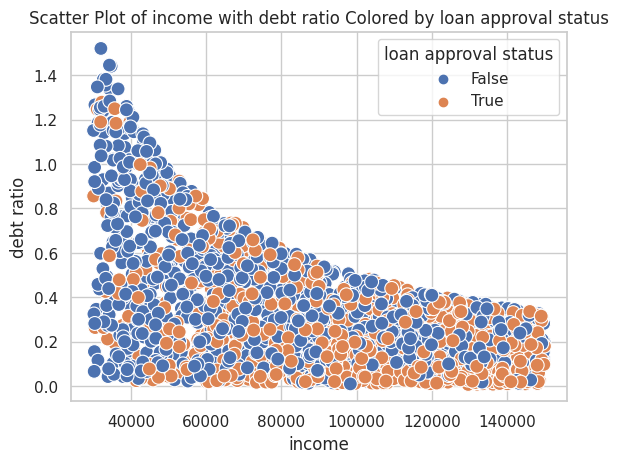

In [34]:
sns.scatterplot(x='income',y='debt_ratio',hue='loan_approved',data=df,s=100)
plt.title('Scatter Plot of income with debt ratio Colored by loan approval status')
plt.xlabel('income')
plt.ylabel('debt ratio')
plt.legend(title='loan approval status')
plt.grid(True)
plt.show()

* We observed applicants having lower income have higher debt ratio, and applicants having higher income have relatively lower debt ratio.
* We observed Debt ratio is left skewed, thus, we have more number of applicants seeking loan which is lesser than their income.
* We also observed that loan approval follows same pattern when comparing applicants whose loan was approved and whose loan was not approved on the basis of debt ratio.
* Thus, for smaller debt ratio (closer to zero), we observed loan application getting approved and rejected. Similarly, for scenarios when debt ratio is higher (greater than 1).
* As the result, we didn't find Debt ratio has a major differentiator between the applicants whose loan was approved and rejected.

**Coverage ratio**

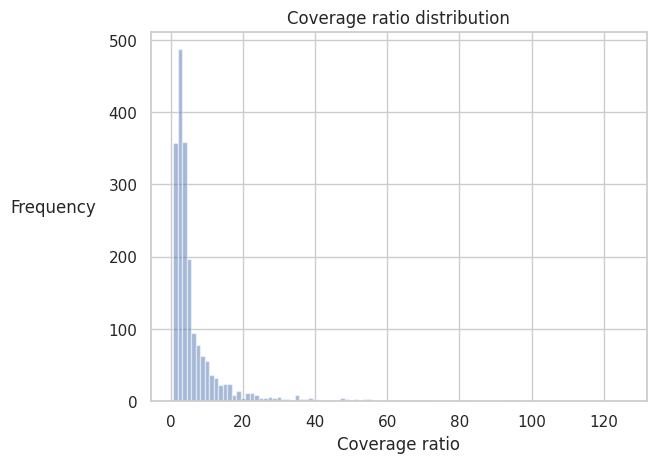

In [35]:
plt.hist(df['coverage_ratio'], bins=100, color='b', alpha=0.5)
plt.title('Coverage ratio distribution')
plt.xlabel('Coverage ratio')
plt.ylabel('Frequency',rotation=0, labelpad=40)
plt.show()

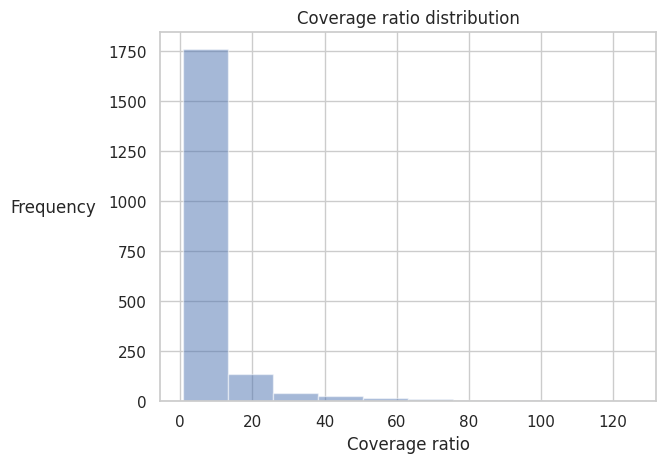

In [36]:
plt.hist(df['coverage_ratio'], bins=10, color='b', alpha=0.5)
plt.title('Coverage ratio distribution')
plt.xlabel('Coverage ratio')
plt.ylabel('Frequency',rotation=0, labelpad=40)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Coverage ratio distribution by Loan approval status')

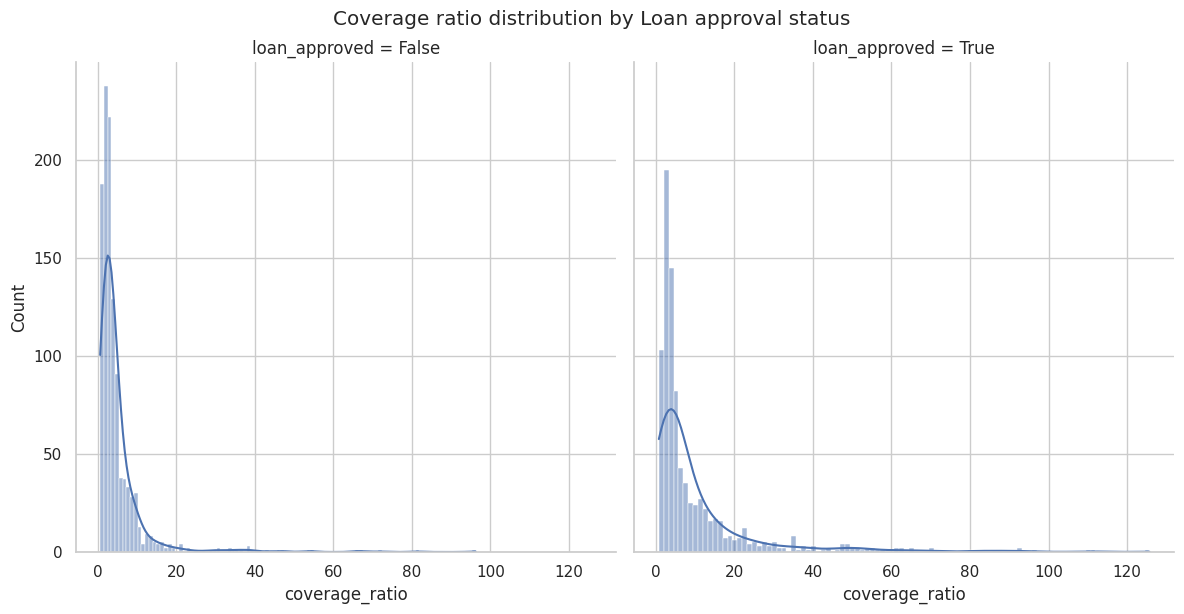

In [37]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'coverage_ratio', bins=100, kde=True)
plt.suptitle("Coverage ratio distribution by Loan approval status", y=1.02)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Coverage ratio distribution by Loan approval status')

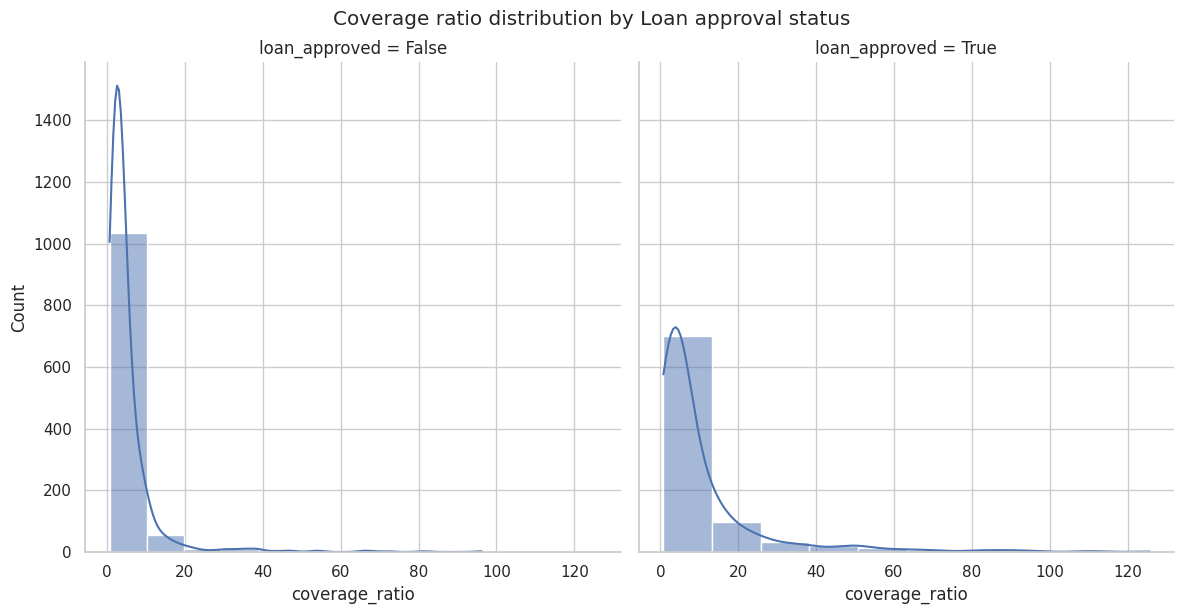

In [38]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'coverage_ratio', bins=10, kde=True)
plt.suptitle("Coverage ratio distribution by Loan approval status", y=1.02)

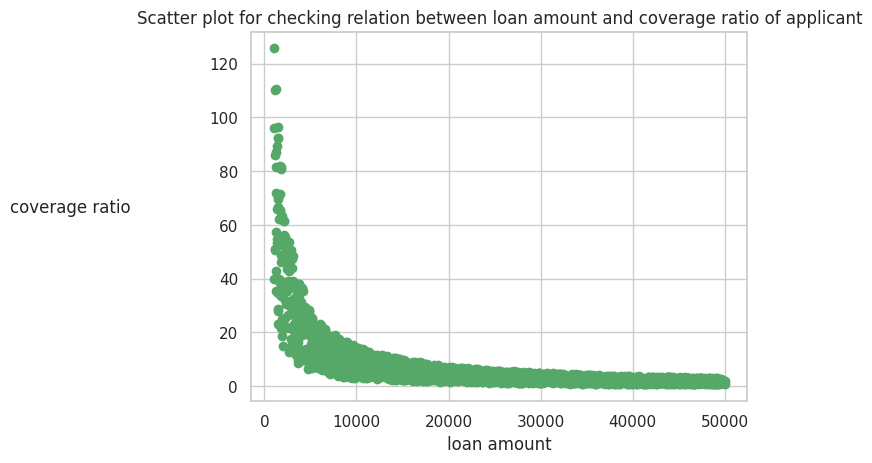

In [39]:
plt.scatter(df['loan_amount'],df['coverage_ratio'],c='g')
plt.title('Scatter plot for checking relation between loan amount and coverage ratio of applicant')
plt.xlabel('loan amount')
plt.ylabel('coverage ratio', rotation=0, labelpad=100)
plt.show()

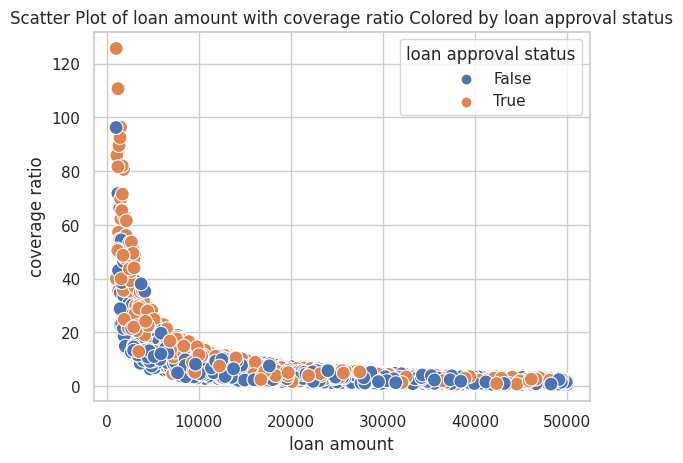

In [40]:
sns.scatterplot(x='loan_amount',y='coverage_ratio',hue='loan_approved',data=df,s=100)
plt.title('Scatter Plot of loan amount with coverage ratio Colored by loan approval status')
plt.xlabel('loan amount')
plt.ylabel('coverage ratio')
plt.legend(title='loan approval status')
plt.grid(True)
plt.show()

* We observed Coverage ratio is left skewed, thus, we have more number of applicants with smaller coverage ratio. 
* This indicates we have more number of applicants having higher risk in servicing debt payments.
* For applicants with lower coverage ratio, we observed more number of loan applications getting denied.
* Broadly, we also observed that loan approval follows similar pattern when comparing applicants whose loan was approved and whose loan was not approved on the basis of coverage ratio. 
* Apart from coverage ratio between 0 to 10, we observed the pattern remains same for applicants whose loan was approved and denied.
* For applicants having coverage ratio between 0 to 10, we have more number of applications getting denied than accepted.
* We also observed that applicants seeking loan less than 10000 have very high coverage ratio. Thus, they have high risk of servicing debt payments.

**Ratio of loan amount and credit score**

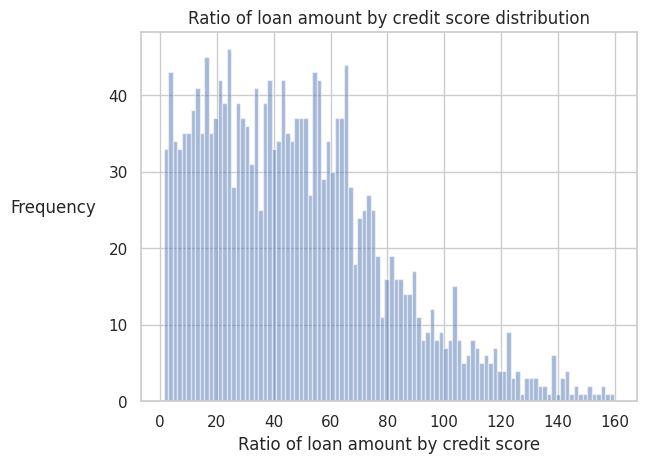

In [41]:
plt.hist(df['ratio_loan_amt_by_credit_score'], bins=100, color='b', alpha=0.5)
plt.title('Ratio of loan amount by credit score distribution')
plt.xlabel('Ratio of loan amount by credit score')
plt.ylabel('Frequency',rotation=0, labelpad=40)
plt.show()

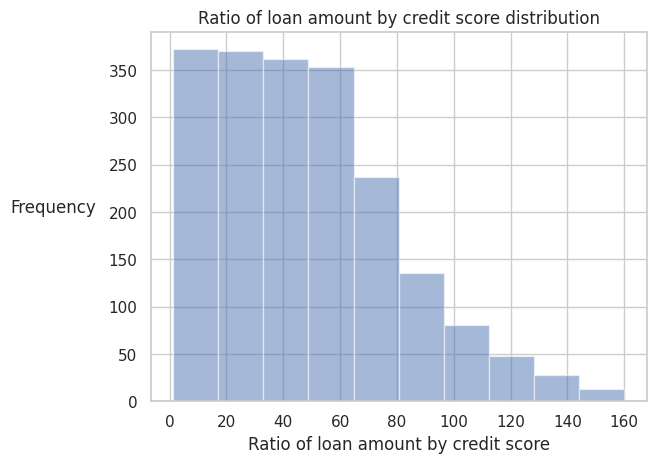

In [42]:
plt.hist(df['ratio_loan_amt_by_credit_score'], bins=10, color='b', alpha=0.5)
plt.title('Ratio of loan amount by credit score distribution')
plt.xlabel('Ratio of loan amount by credit score')
plt.ylabel('Frequency',rotation=0, labelpad=40)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Ratio of loan amount by credit score distribution by Loan approval status')

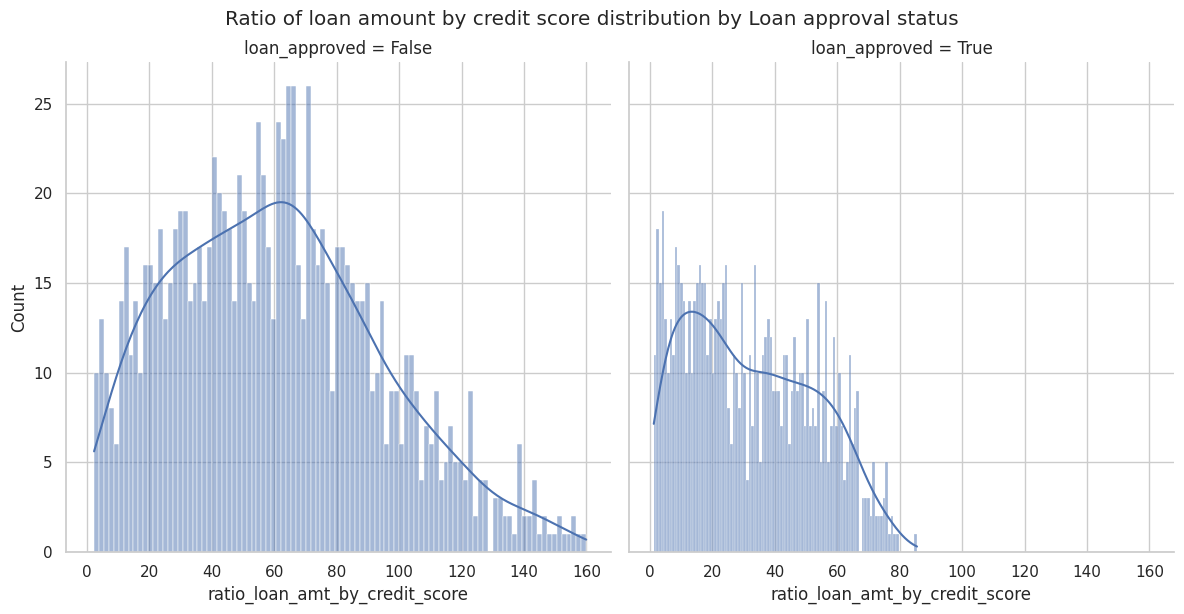

In [43]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'ratio_loan_amt_by_credit_score', bins=100, kde=True)
plt.suptitle("Ratio of loan amount by credit score distribution by Loan approval status", y=1.02)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Ratio of loan amount by credit score distribution by Loan approval status')

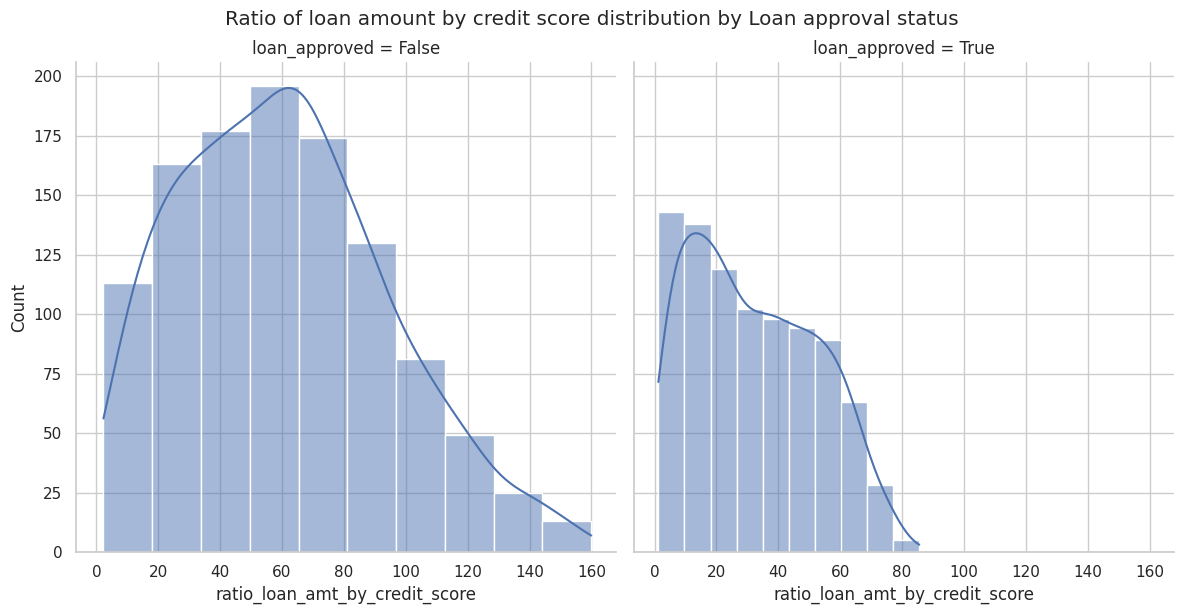

In [44]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'ratio_loan_amt_by_credit_score', bins=10, kde=True)
plt.suptitle("Ratio of loan amount by credit score distribution by Loan approval status", y=1.02)

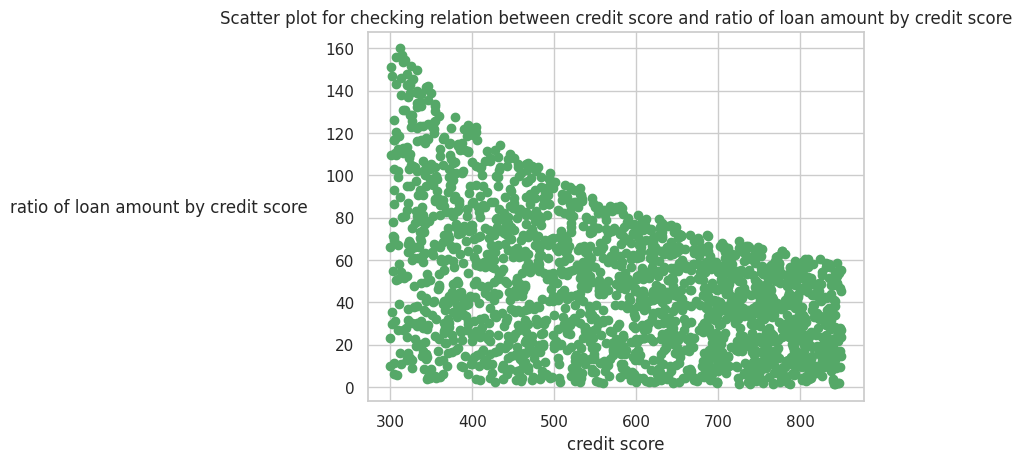

In [45]:
plt.scatter(df['credit_score'],df['ratio_loan_amt_by_credit_score'],c='g')
plt.title('Scatter plot for checking relation between credit score and ratio of loan amount by credit score')
plt.xlabel('credit score')
plt.ylabel('ratio of loan amount by credit score', rotation=0, labelpad=120)
plt.show()

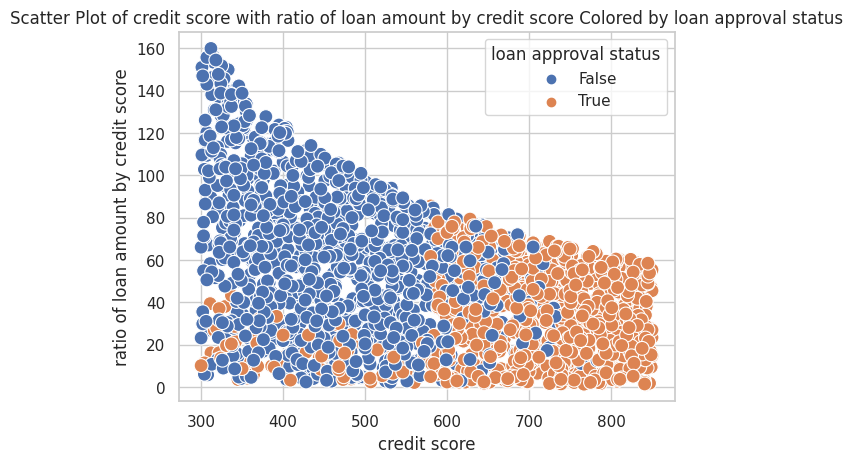

In [46]:
sns.scatterplot(x='credit_score',y='ratio_loan_amt_by_credit_score',hue='loan_approved',data=df,s=100)
plt.title('Scatter Plot of credit score with ratio of loan amount by credit score Colored by loan approval status')
plt.xlabel('credit score')
plt.ylabel('ratio of loan amount by credit score')
plt.legend(title='loan approval status')
plt.grid(True)
plt.show()

* Among the applicants whose loan application was denied and the ratio was in the range 0 to 70, we observed the count of those applications increased from around 50 to 200.
* After the ratio cross 70, we observed decline in number of applicants, and accordingly decline in loan applications getting denied.
* However, among the applicants whose loan application was approved, we observed the steep rise in count of those applications when ratio was in the range 0 to 20.
* After the ratio crossed 20 and reached 80, we observed consistent decline in applicants and the loan applications getting approved.
* Applicants with lower credit score asked for higher loan amount, compared to applicants with higher credit score asked for smaller loan amount.
* From the scatter plot we could infer that for most of the applicants whose credit score was lesser than 600, their loan application was not approved.
* And for applicants whose credit score was greater than 600, most of the applications for loan were approved.
* Thus, **credit score** is an important differentiator between the two categories of applicants.
* For applicants with credit score lesser than 600, and for smaller loan amount, we observed for some of them the loans were approved.
* For applicants with credit score between 300 to 600, loan amount per unit of credit score ranges between 0 to 160. And we observed most of the loan applications got denied.
* For applicants with credit score between 600 to 1000, loan amount per unit of credit score ranges between 0 to 80. And we observed most of the loan applications got approved.
* Thus, we could infer that applicants with credit score lesser than 300, were seeking more loan per unit of credit score, and their servicing of debt would be relatively at higher risk, compared to the applicants with credit score greater than 300 where the applicants were seeking less loan per unit of credit score.

**Ratio of loan amount by years employed**

In [47]:
finite_ratios = df['ratio_loan_amt_by_work_exp'][np.isfinite(df['ratio_loan_amt_by_work_exp'])]
num_excluded = len(df['ratio_loan_amt_by_work_exp']) - len(finite_ratios)
print(f"Excluded {num_excluded} non-finite values from the histogram.")

Excluded 43 non-finite values from the histogram.


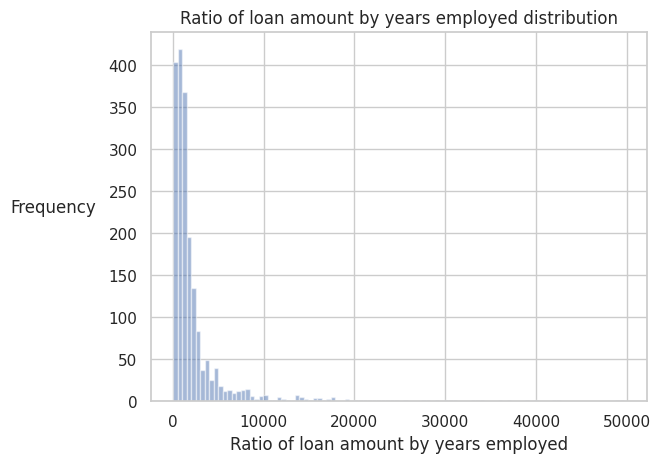

In [48]:
plt.hist(finite_ratios, bins=100, color='b', alpha=0.5)
plt.title('Ratio of loan amount by years employed distribution')
plt.xlabel('Ratio of loan amount by years employed')
plt.ylabel('Frequency', rotation=0, labelpad=40)
plt.show()

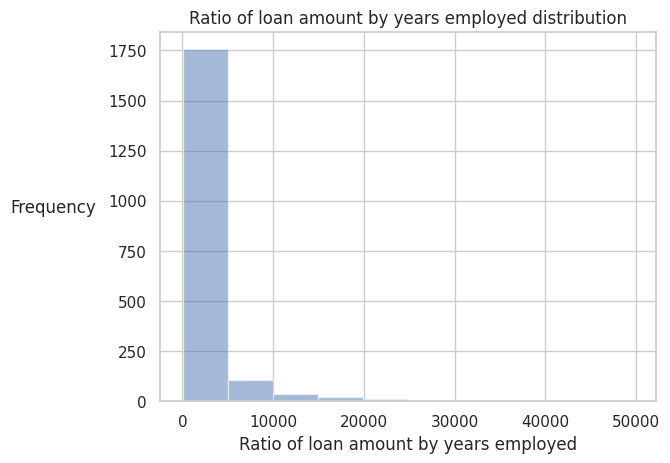

In [49]:
plt.hist(finite_ratios, bins=10, color='b', alpha=0.5)
plt.title('Ratio of loan amount by years employed distribution')
plt.xlabel('Ratio of loan amount by years employed')
plt.ylabel('Frequency', rotation=0, labelpad=40)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Ratio of loan amount by years employed distribution by Loan approval status')

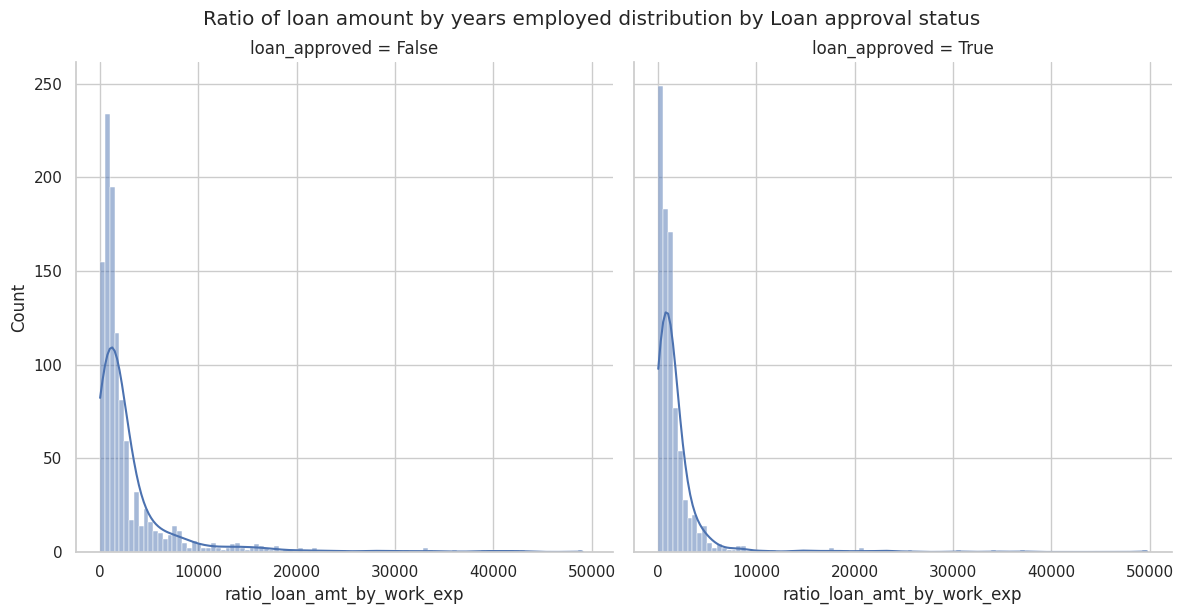

In [50]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'ratio_loan_amt_by_work_exp', bins=100, kde=True)
plt.suptitle("Ratio of loan amount by years employed distribution by Loan approval status", y=1.02)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Ratio of loan amount by years employed distribution by Loan approval status')

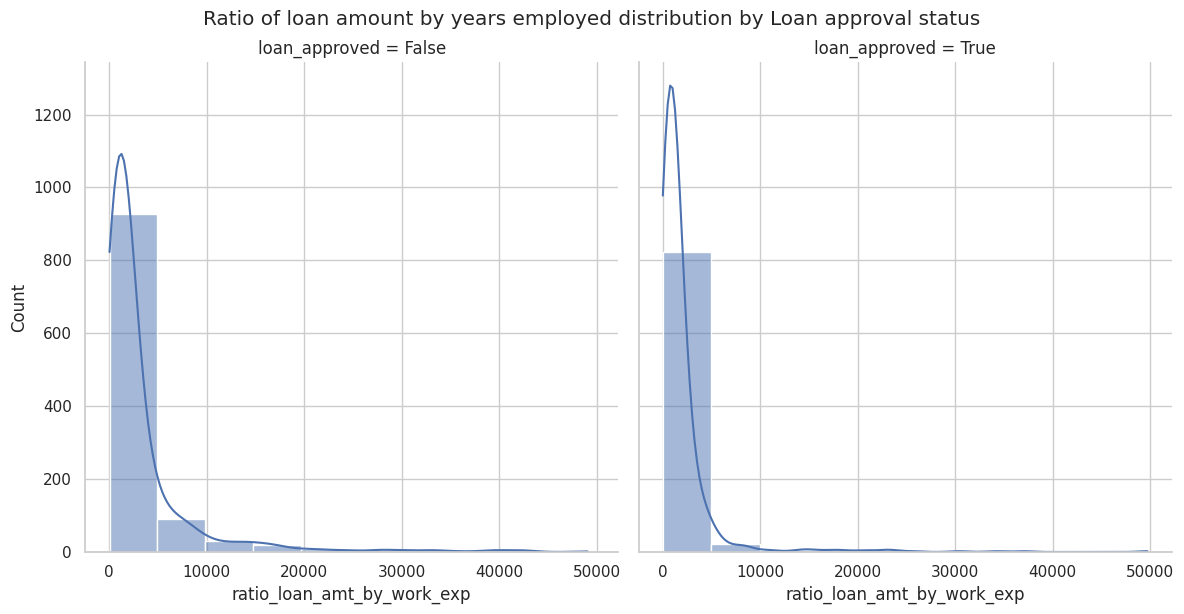

In [51]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'ratio_loan_amt_by_work_exp', bins=10, kde=True)
plt.suptitle("Ratio of loan amount by years employed distribution by Loan approval status", y=1.02)

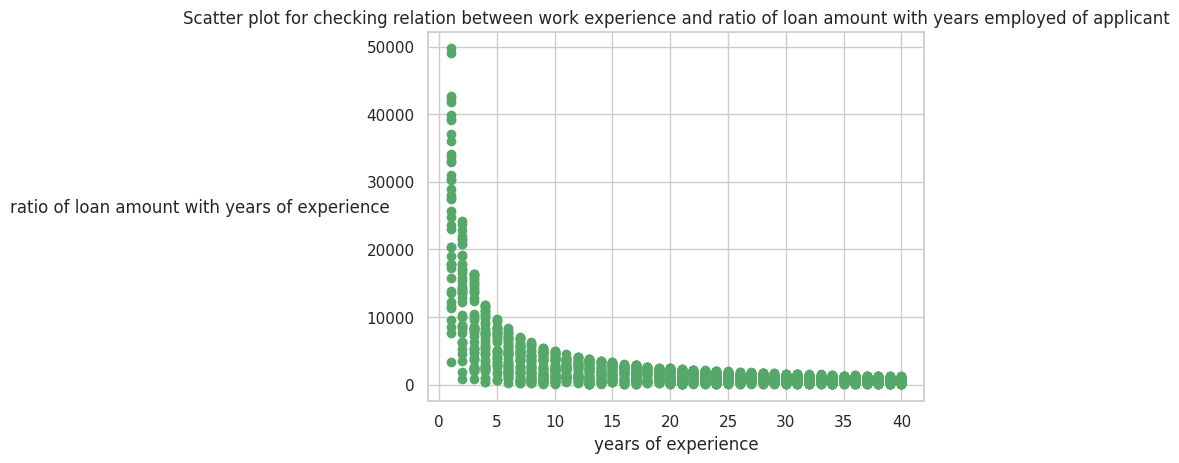

In [52]:
plt.scatter(df['years_employed'],df['ratio_loan_amt_by_work_exp'],c='g')
plt.title('Scatter plot for checking relation between work experience and ratio of loan amount with years employed of applicant')
plt.xlabel('years of experience')
plt.ylabel('ratio of loan amount with years of experience', rotation=0, labelpad=120)
plt.show()

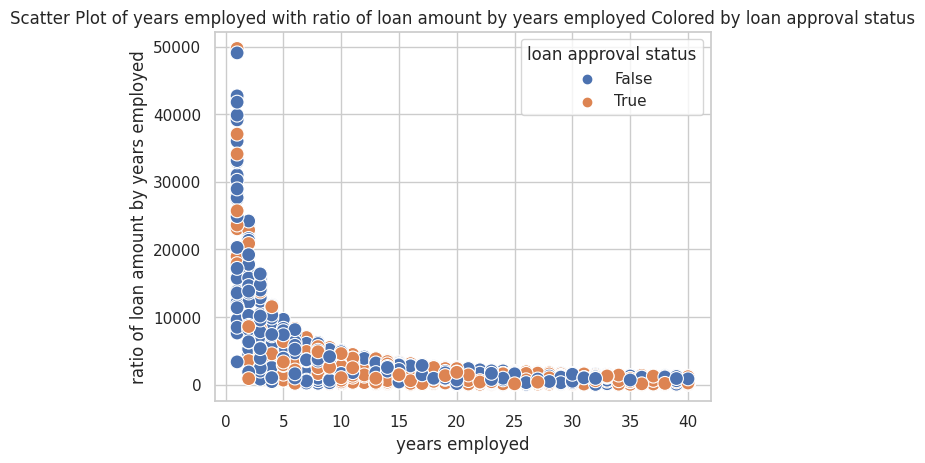

In [53]:
sns.scatterplot(x='years_employed',y='ratio_loan_amt_by_work_exp',hue='loan_approved',data=df,s=100)
plt.title('Scatter Plot of years employed with ratio of loan amount by years employed Colored by loan approval status')
plt.xlabel('years employed')
plt.ylabel('ratio of loan amount by years employed')
plt.legend(title='loan approval status')
plt.grid(True)
plt.show()

* Applicants who have lesser tenure of employment have asked for higher loan amount and applicants with higher tenure of employment have asked for smaller loan amount.
* Thus, higher loan amount is asked by people who have recently started working.

**Ratio of points by years employed**

In [54]:
finite_ratios_points_workexp = df['ratio_points_by_work_exp'][np.isfinite(df['ratio_points_by_work_exp'])]
num_excluded = len(df['ratio_points_by_work_exp']) - len(finite_ratios_points_workexp)
print(f"Excluded {num_excluded} non-finite values from the histogram.")

Excluded 43 non-finite values from the histogram.


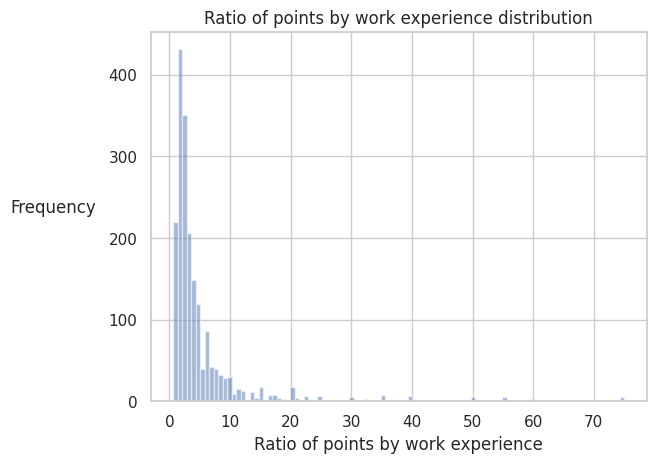

In [55]:
plt.hist(finite_ratios_points_workexp, bins=100, color='b', alpha=0.5)
plt.title('Ratio of points by work experience distribution')
plt.xlabel('Ratio of points by work experience')
plt.ylabel('Frequency',rotation=0, labelpad=40)
plt.show()

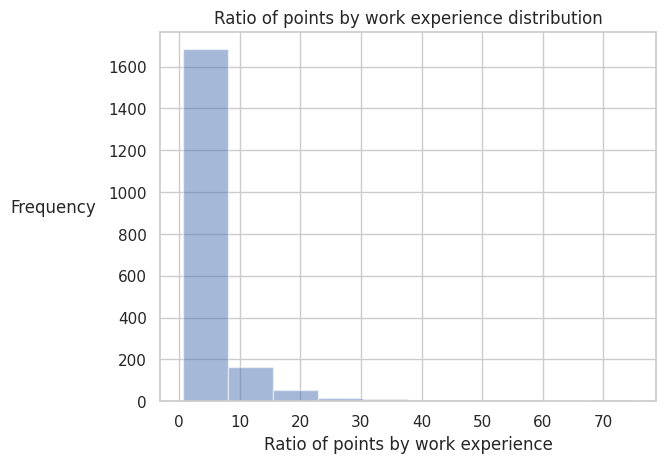

In [56]:
plt.hist(finite_ratios_points_workexp, bins=10, color='b', alpha=0.5)
plt.title('Ratio of points by work experience distribution')
plt.xlabel('Ratio of points by work experience')
plt.ylabel('Frequency',rotation=0, labelpad=40)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Ratio of points by years employed distribution by Loan approval status')

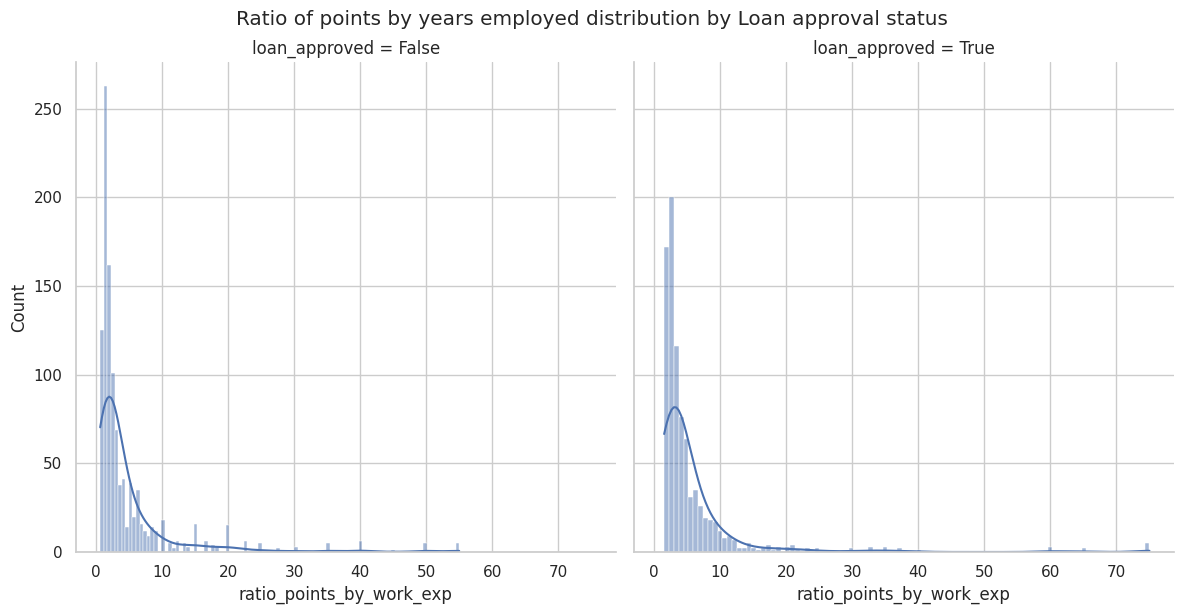

In [57]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'ratio_points_by_work_exp', bins=100, kde=True)
plt.suptitle("Ratio of points by years employed distribution by Loan approval status", y=1.02)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Ratio of points by years employed distribution by Loan approval status')

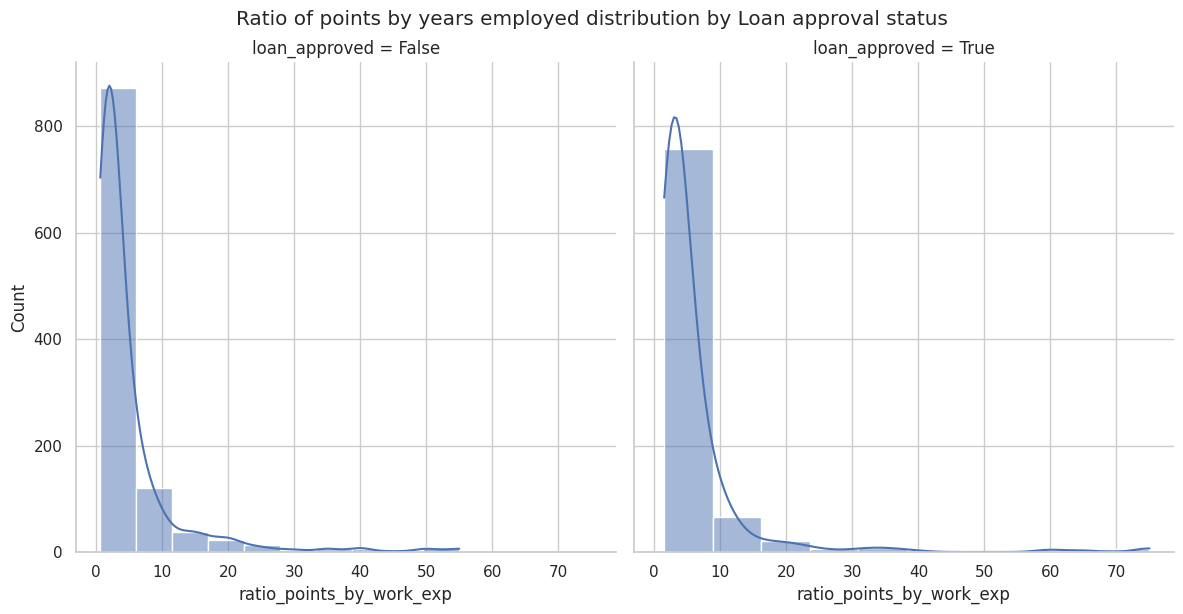

In [58]:
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'ratio_points_by_work_exp', bins=10, kde=True)
plt.suptitle("Ratio of points by years employed distribution by Loan approval status", y=1.02)

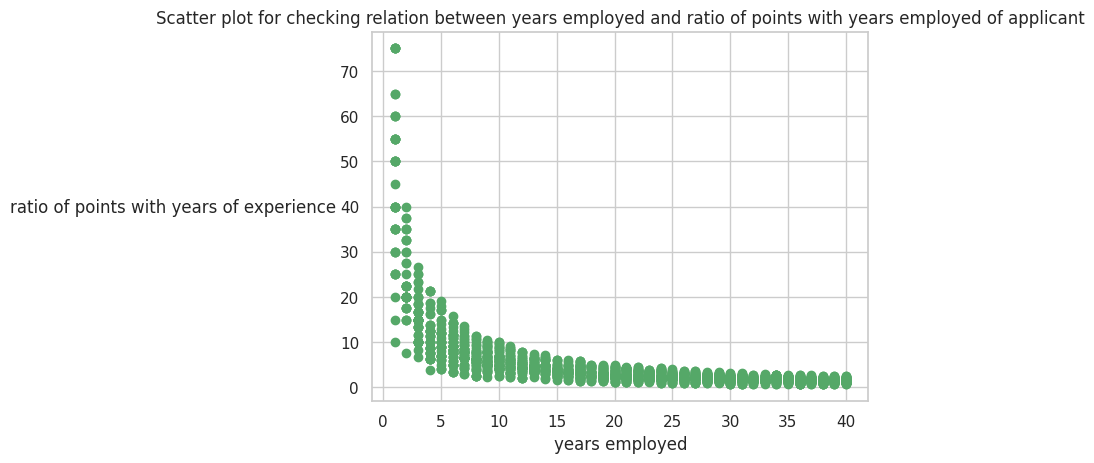

In [59]:
plt.scatter(df['years_employed'],df['ratio_points_by_work_exp'],c='g')
plt.title('Scatter plot for checking relation between years employed and ratio of points with years employed of applicant')
plt.xlabel('years employed')
plt.ylabel('ratio of points with years of experience', rotation=0, labelpad=120)
plt.show()

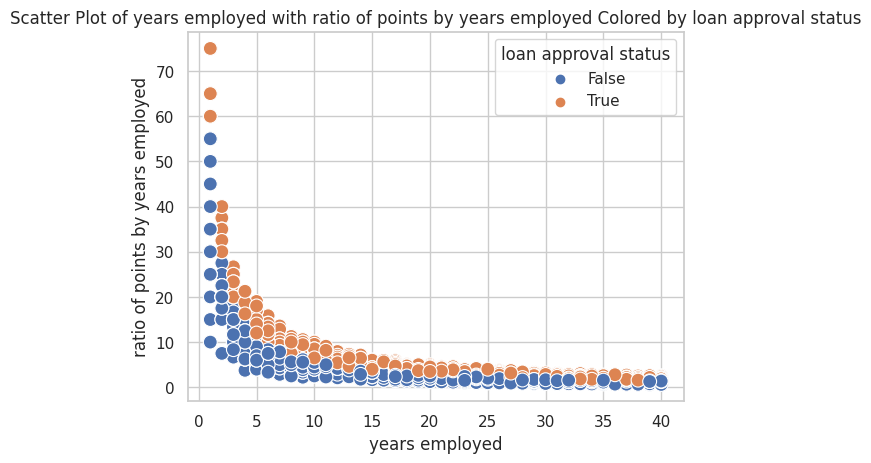

In [60]:
sns.scatterplot(x='years_employed',y='ratio_points_by_work_exp',hue='loan_approved',data=df,s=100)
plt.title('Scatter Plot of years employed with ratio of points by years employed Colored by loan approval status')
plt.xlabel('years employed')
plt.ylabel('ratio of points by years employed')
plt.legend(title='loan approval status')
plt.grid(True)
plt.show()

* The ratio of points by years employed is left skewed and follows similar distribution for applicants whose loan application was approved and denied.
* Applicants with lesser work experience have more points than the applicants with higher work experience.
* With scatter plot, we did not observed any difference among the approval of loan applications when comparing work experience of applicant with ratio of points and years employed.
* Thus, ratio of points by years employed is not useful to determine any important attributes for loan application status.

**Ratio of points by income**

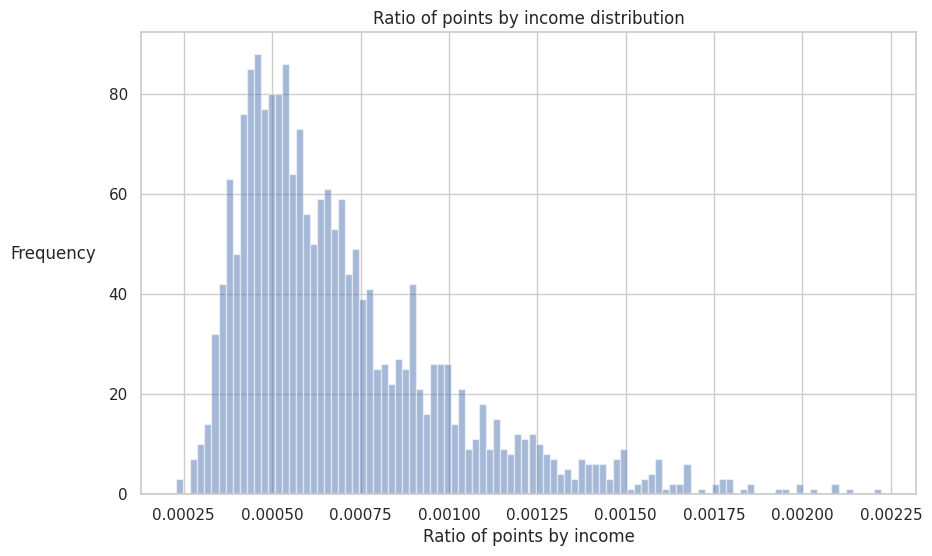

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(df['ratio_points_by_income'], bins=100, color='b', alpha=0.5)
plt.title('Ratio of points by income distribution')
plt.xlabel('Ratio of points by income')
plt.ylabel('Frequency',rotation=0, labelpad=40)
plt.show()

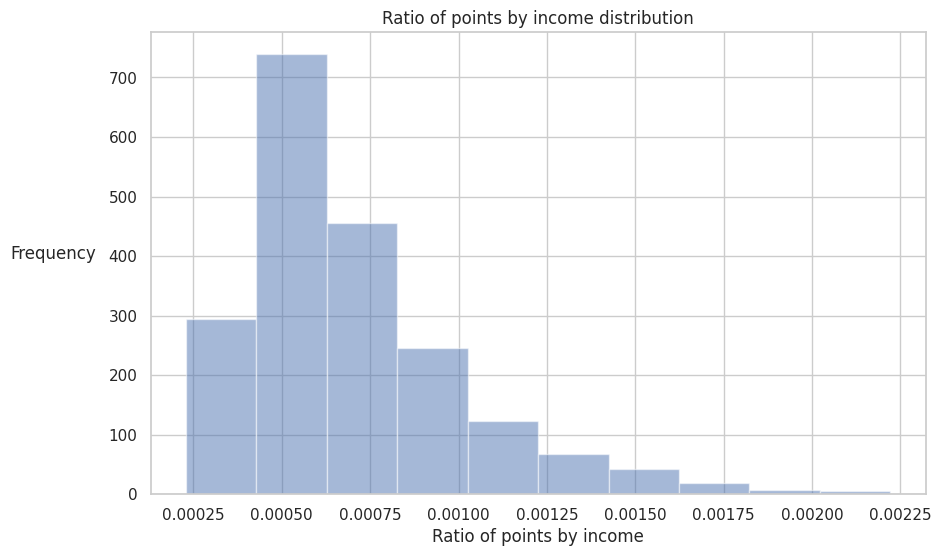

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df['ratio_points_by_income'], bins=10, color='b', alpha=0.5)
plt.title('Ratio of points by income distribution')
plt.xlabel('Ratio of points by income')
plt.ylabel('Frequency',rotation=0, labelpad=40)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Ratio of points by income distribution by Loan approval status')

<Figure size 1000x600 with 0 Axes>

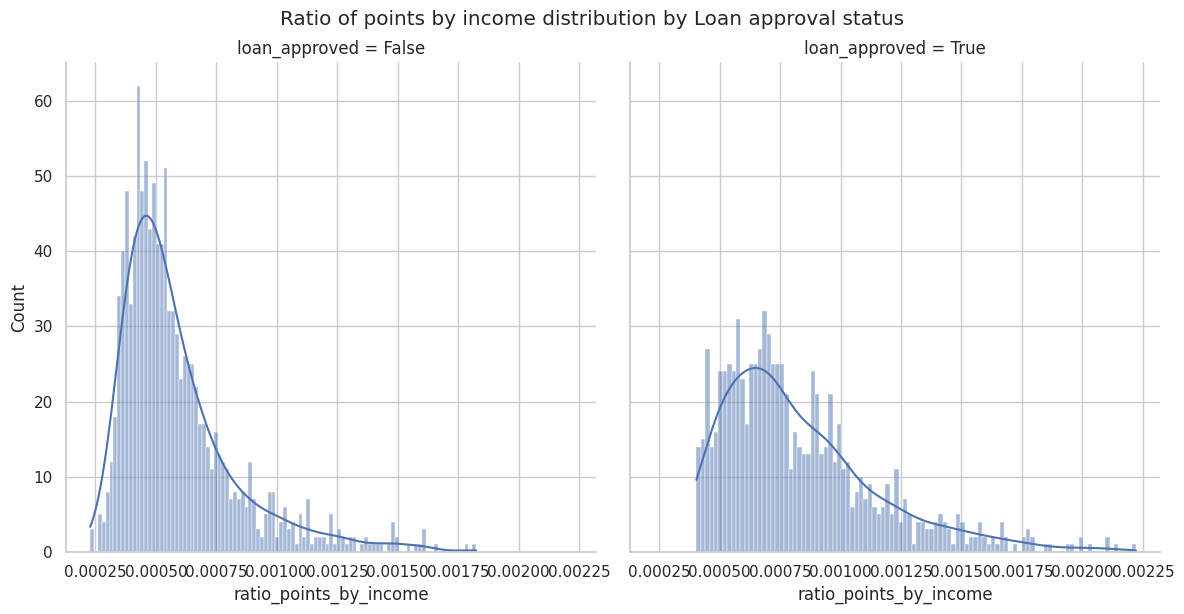

In [63]:
plt.figure(figsize=(10, 6))
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'ratio_points_by_income', bins=100, kde=True)
plt.suptitle("Ratio of points by income distribution by Loan approval status", y=1.02)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Ratio of points by income distribution by Loan approval status')

<Figure size 1000x600 with 0 Axes>

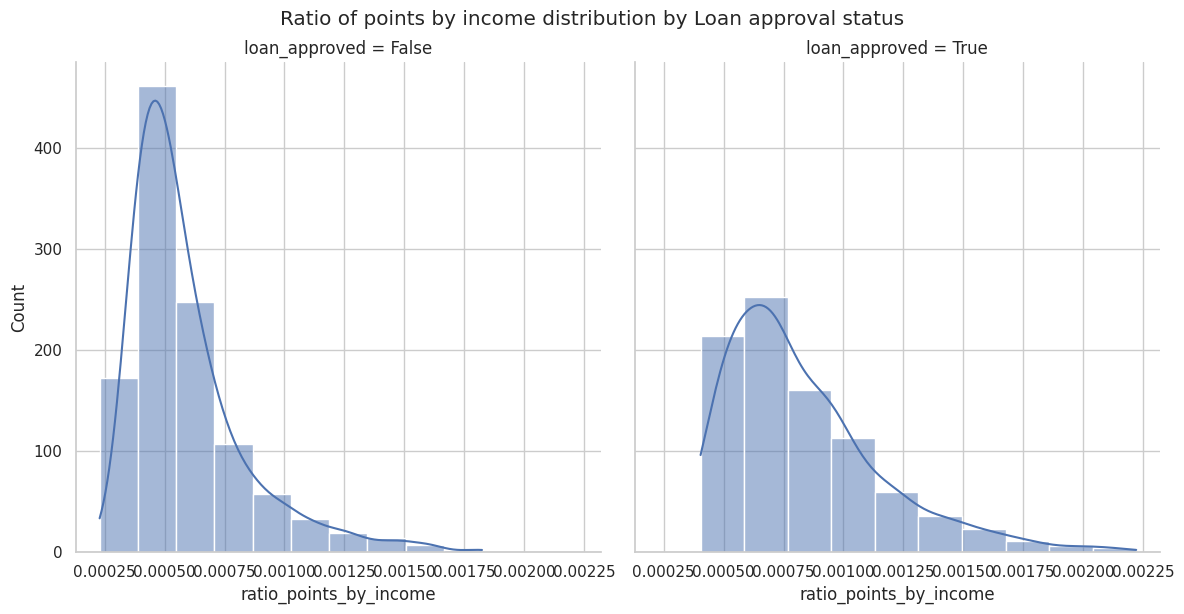

In [64]:
plt.figure(figsize=(10, 6))
g=sns.FacetGrid(df, col='loan_approved', height=6)
g.map(sns.histplot, 'ratio_points_by_income', bins=10, kde=True)
plt.suptitle("Ratio of points by income distribution by Loan approval status", y=1.02)

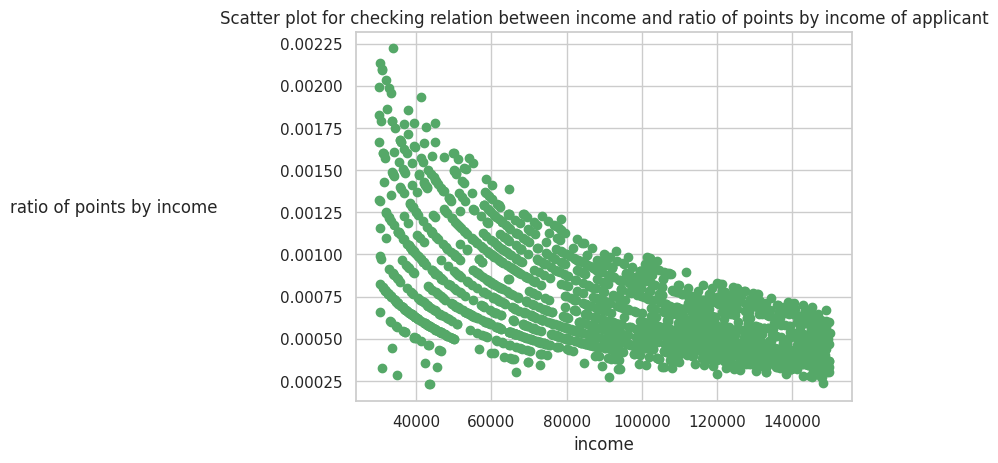

In [65]:
plt.scatter(df['income'],df['ratio_points_by_income'],c='g')
plt.title('Scatter plot for checking relation between income and ratio of points by income of applicant')
plt.xlabel('income')
plt.ylabel('ratio of points by income', rotation=0, labelpad=120)
plt.show()

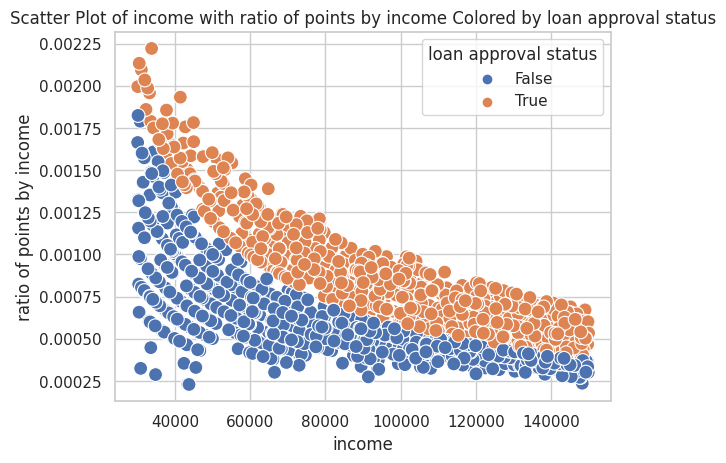

In [66]:
sns.scatterplot(x='income',y='ratio_points_by_income',hue='loan_approved',data=df,s=100)
plt.title('Scatter Plot of income with ratio of points by income Colored by loan approval status')
plt.xlabel('income')
plt.ylabel('ratio of points by income')
plt.legend(title='loan approval status')
plt.grid(True)
plt.show()

* We observed for applicants across different level of income, loan approval probability is higher for applicants with more number of points.
* Thus, if two applicants have same income, then the applicant with relatively higher number of points has better likelihood of the loan application getting approved.
* As the income increases the ratio of points by income decreases.
* In the scatter plot with loan approval status, we observed that all applicants whose loan application was not approved had lesser ratio than the applicants whose loan application was approved. Moreover, there was no overlapping of data points observed between the two categories of applicants.
* Thus, the **ratio of points by income** plays an important role to determine the loan application status.